## Лінки

урл: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction?select=Churn_Modelling.csv
веб-морда, працює з ключем опен-аі: https://bank-churn-diploma-essnpc2era6k3nztbvguup.streamlit.app/
гітхаб: https://github.com/alexkh2022/bank-churn-diploma

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

# print("Path to dataset files:", path)



## БЛОК 2.00: Імпорт бібліотек та налаштування (Оновлений)

In [4]:
# БЛОК 2.00: Імпорт бібліотек та налаштування (Оновлений)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Це магічна команда для Jupyter: малювати графіки у векторі (SVG)
# Вигляд на екрані стане набагато чіткішим
%config InlineBackend.figure_format = 'svg'

# Відключення попереджень
warnings.filterwarnings('ignore')

# Налаштування відображення Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Налаштування стилю
sns.set(style="whitegrid", palette="muted")

# Створення папки для збереження результатів, якщо її немає
output_dir = "output_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Папку '{output_dir}' створено.")
else:
    print(f"Папка '{output_dir}' вже існує.")

print("Блок 2.00: Бібліотеки та налаштування застосовано.")

Папка 'output_images' вже існує.
Блок 2.00: Бібліотеки та налаштування застосовано.


## БЛОК 2.10: Завантаження даних

In [5]:
# БЛОК 2.10: Завантаження даних
file_path = os.path.join("dataset", "Churn_Modelling.csv")

try:
    df = pd.read_csv(file_path)
    print(f"Блок 2.10: Дані завантажено успішно.")
    print(f"Розмір датасету: {df.shape[0]} рядків, {df.shape[1]} колонок.")
    print("-" * 50)
    print("Типи даних:")
    print(df.dtypes)
except FileNotFoundError:
    print(f"ПОМИЛКА: Файл не знайдено за шляхом: {file_path}")

Блок 2.10: Дані завантажено успішно.
Розмір датасету: 10000 рядків, 14 колонок.
--------------------------------------------------
Типи даних:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


## БЛОК 2.20: Перевірка на пропуски та дублікати

In [6]:
# БЛОК 2.20: Перевірка на пропуски та дублікати

# 1. Перевірка пропусків
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# 2. Перевірка повних дублікатів рядків
duplicates_count = df.duplicated().sum()

print("=== ЗВІТ ПРО ЯКІСТЬ ДАНИХ ===")
print(f"Кількість повних дублікатів рядків: {duplicates_count}")
print("\nПропуски по колонках:")
# Створюємо гарну табличку для виводу
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
# Виводимо тільки ті, де є пропуски, або повідомлення, що все чисто
if missing_report['Missing Values'].sum() == 0:
    print("Пропусків не виявлено. Датасет повний.")
else:
    print(missing_report[missing_report['Missing Values'] > 0])

=== ЗВІТ ПРО ЯКІСТЬ ДАНИХ ===
Кількість повних дублікатів рядків: 0

Пропуски по колонках:
Пропусків не виявлено. Датасет повний.


## БЛОК 2.30: Детальний аналіз числових змінних з ЕКСПОРТОМ


==================== АНАЛІЗ КОЛОНКИ: CreditScore ====================
Середнє: 650.53
Медіана: 652.00
Мін: 350.00 | Макс: 850.00
Станд. відхилення: 96.65

--- Аналіз викидів (IQR method) ---
Межі нормальних значень: від 383.00 до 919.00
Кількість викидів: 15 (0.15%)
Приклади викидів (топ-5): [376 376 363 359 350]



[INFO] Графік збережено: output_images\CreditScore_analysis.svg


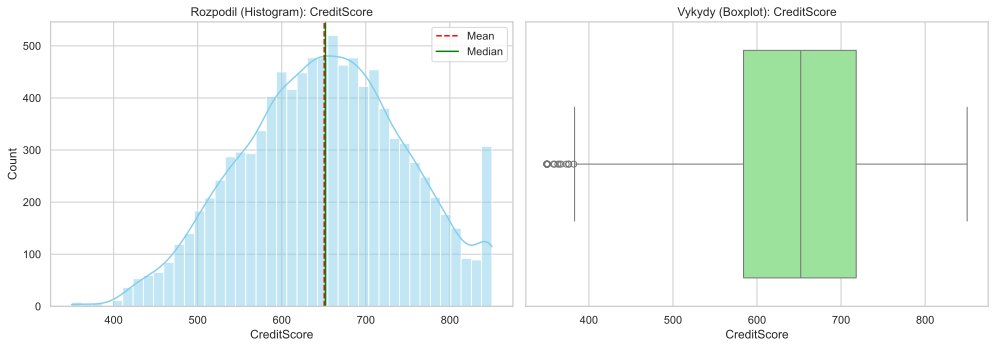


==================== АНАЛІЗ КОЛОНКИ: Age ====================
Середнє: 38.92
Медіана: 37.00
Мін: 18.00 | Макс: 92.00
Станд. відхилення: 10.49

--- Аналіз викидів (IQR method) ---
Межі нормальних значень: від 14.00 до 62.00
Кількість викидів: 359 (3.59%)
Приклади викидів (топ-5): [66 75 65 73 65]

[INFO] Графік збережено: output_images\Age_analysis.svg


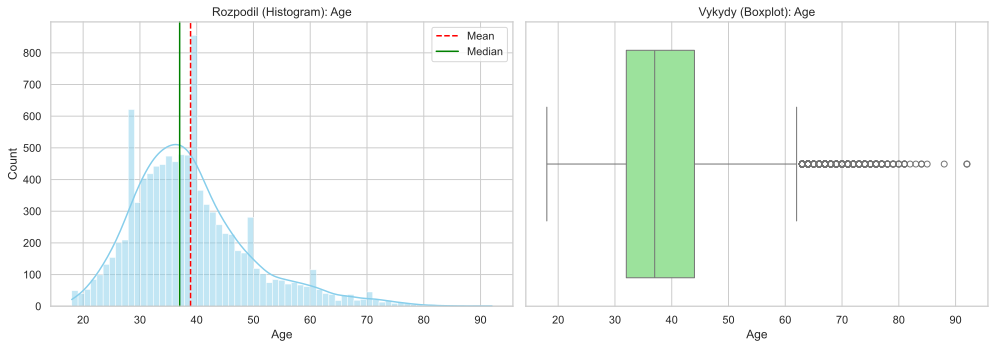


==================== АНАЛІЗ КОЛОНКИ: Tenure ====================
Середнє: 5.01
Медіана: 5.00
Мін: 0.00 | Макс: 10.00
Станд. відхилення: 2.89

--- Аналіз викидів (IQR method) ---
Межі нормальних значень: від -3.00 до 13.00
Кількість викидів: 0 (0.00%)

[INFO] Графік збережено: output_images\Tenure_analysis.svg


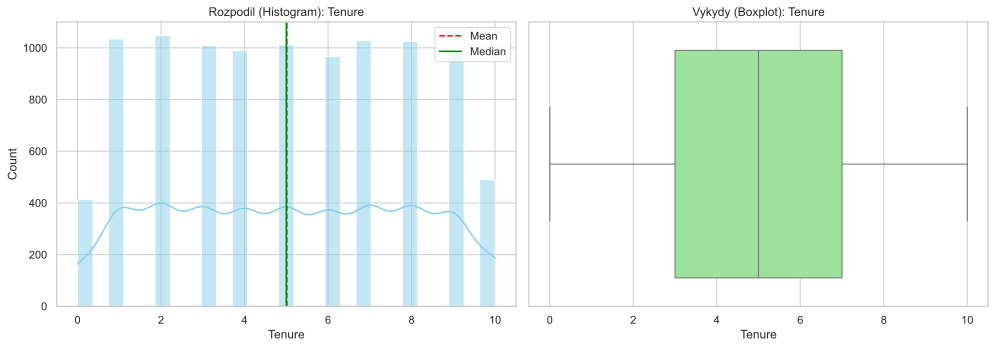


==================== АНАЛІЗ КОЛОНКИ: Balance ====================
Середнє: 76485.89
Медіана: 97198.54
Мін: 0.00 | Макс: 250898.09
Станд. відхилення: 62397.41

--- Аналіз викидів (IQR method) ---
Межі нормальних значень: від -191466.36 до 319110.60
Кількість викидів: 0 (0.00%)

[INFO] Графік збережено: output_images\Balance_analysis.svg


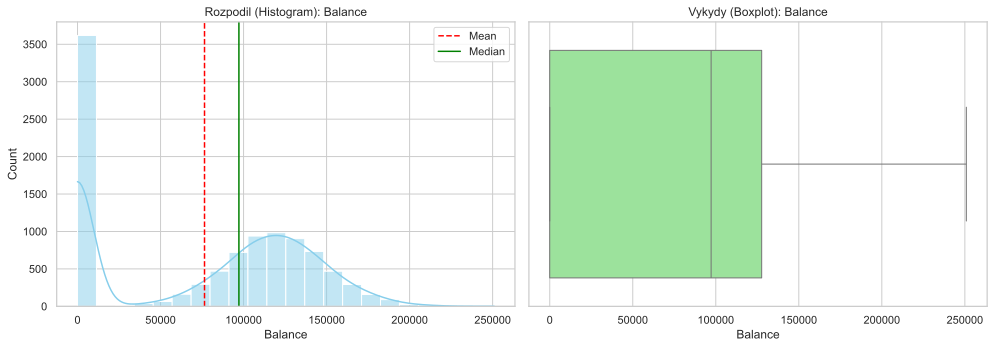


==================== АНАЛІЗ КОЛОНКИ: NumOfProducts ====================
Середнє: 1.53
Медіана: 1.00
Мін: 1.00 | Макс: 4.00
Станд. відхилення: 0.58

--- Аналіз викидів (IQR method) ---
Межі нормальних значень: від -0.50 до 3.50
Кількість викидів: 60 (0.60%)
Приклади викидів (топ-5): [4 4 4 4 4]

[INFO] Графік збережено: output_images\NumOfProducts_analysis.svg


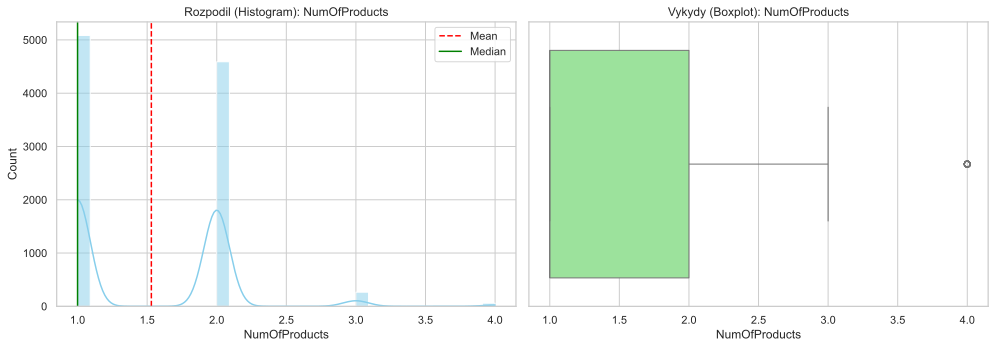


==================== АНАЛІЗ КОЛОНКИ: EstimatedSalary ====================
Середнє: 100090.24
Медіана: 100193.91
Мін: 11.58 | Макс: 199992.48
Станд. відхилення: 57510.49

--- Аналіз викидів (IQR method) ---
Межі нормальних значень: від -96577.10 до 296967.45
Кількість викидів: 0 (0.00%)

[INFO] Графік збережено: output_images\EstimatedSalary_analysis.svg


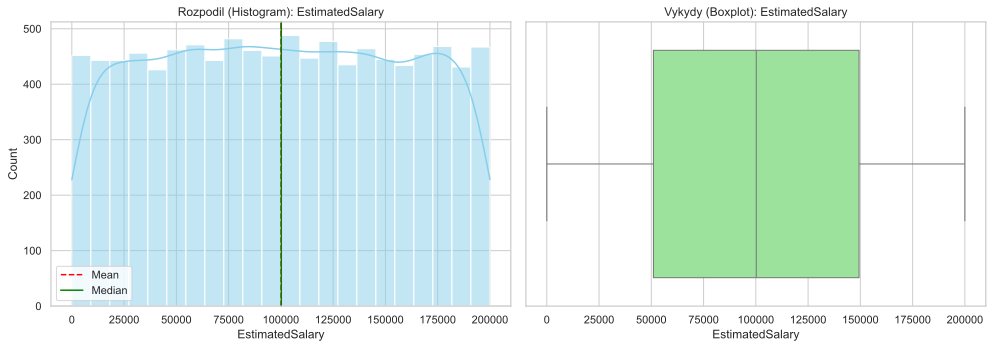

In [7]:
# БЛОК 2.30: Детальний аналіз числових змінних з ЕКСПОРТОМ

def analyze_numerical(df, column_name, save_folder="output_images"):
    print(f"\n{'='*20} АНАЛІЗ КОЛОНКИ: {column_name} {'='*20}")
    
    # 1. Основні статистики
    desc = df[column_name].describe()
    print(f"Середнє: {desc['mean']:.2f}")
    print(f"Медіана: {desc['50%']:.2f}")
    print(f"Мін: {desc['min']:.2f} | Макс: {desc['max']:.2f}")
    print(f"Станд. відхилення: {desc['std']:.2f}")

    # 2. Пошук викидів (Метод IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]
    percent_outliers = (num_outliers / df.shape[0]) * 100
    
    print(f"\n--- Аналіз викидів (IQR method) ---")
    print(f"Межі нормальних значень: від {lower_bound:.2f} до {upper_bound:.2f}")
    print(f"Кількість викидів: {num_outliers} ({percent_outliers:.2f}%)")
    
    if num_outliers > 0:
        print(f"Приклади викидів (топ-5): {outliers[column_name].values[:5]}")
    
    # 3. Візуалізація та Збереження
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Гістограма
    sns.histplot(df[column_name], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Rozpodil (Histogram): {column_name}')
    axes[0].axvline(desc['mean'], color='red', linestyle='--', label='Mean')
    axes[0].axvline(desc['50%'], color='green', linestyle='-', label='Median')
    axes[0].legend()
    
    # Boxplot
    sns.boxplot(x=df[column_name], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Vykydy (Boxplot): {column_name}')
    
    plt.tight_layout()
    
    # ЗБЕРЕЖЕННЯ (SVG для вебу/презентації, PDF для друку)
    # SVG - це текст (XML), тому він легкий і ідеально масштабується
    svg_path = os.path.join(save_folder, f"{column_name}_analysis.svg")
    pdf_path = os.path.join(save_folder, f"{column_name}_analysis.pdf")
    
    plt.savefig(svg_path, format='svg', bbox_inches='tight')
    plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
    
    print(f"\n[INFO] Графік збережено: {svg_path}")
    plt.show()

# Список числових колонок
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numeric_cols:
    analyze_numerical(df, col)

2.3. Результати розвідувального аналізу (EDA)
На основі статистичного аналізу та візуалізації розподілів було виявлено наступні аномалії та закономірності:
1. CreditScore (Кредитний рейтинг): Розподіл наближений до нормального, проте спостерігається виражений "ефект стелі" — аномальна кількість клієнтів (понад 300) мають максимально можливий рейтинг 850. Також виявлено невелику групу ризику (0.15%) з аномально низьким рейтингом (<383).
2. Age (Вік): Розподіл зміщений вправо. Виявлено локальні сплески концентрації клієнтів у віці 28, 38 та 50 років, що може свідчити про специфіку маркетингових кампаній банку в минулому. Група 62+ (3.59% вибірки) визначена статистично як "викиди", проте бізнес-логіка підказує, що це важливий сегмент пенсіонерів зі стабільними активами.
3. Balance (Баланс): Виявлено чіткий бімодальний розподіл. Понад 36% клієнтів (~3600 осіб) мають баланс 0. Це вимагає окремої сегментації, оскільки поведінка клієнтів з нульовим балансом (пасивні або кредитні користувачі) кардинально відрізняється від депозитних клієнтів.
4. NumOfProducts (Продукти): Клієнтська база різко поляризована. Основна маса користується 1 або 2 продуктами. Клієнти з 3 (2-3%) та 4 (<1%) продуктами є рідкістю. Попередній аналіз показує, що саме ця малочисельна група має аномально високий ризик відтоку, що потребує детального вивчення (див. п. 2.5).

## БЛОК 2.40: Перевірка гіпотези "Нульовий баланс"

Перевіряємо, чим відрізняються люди з 0 на рахунку. Чи правда вони бідніші? Чи частіше вони йдуть?


==================== ГЛИБОКИЙ АНАЛІЗ: СЕГМЕНТ ZERO BALANCE ====================
Клієнтів з 0 балансом: 3617 (36.2%)
Клієнтів з балансом > 0: 6383 (63.8%)

--- Відтік (Churn Rate) ---
Серед тих, у кого 0 баланс: 13.82%
Серед тих, у кого є гроші:  24.08%

--- Середня зарплата ---
Сегмент 0 балансу: 98983.56
Сегмент з грошима: 100717.35


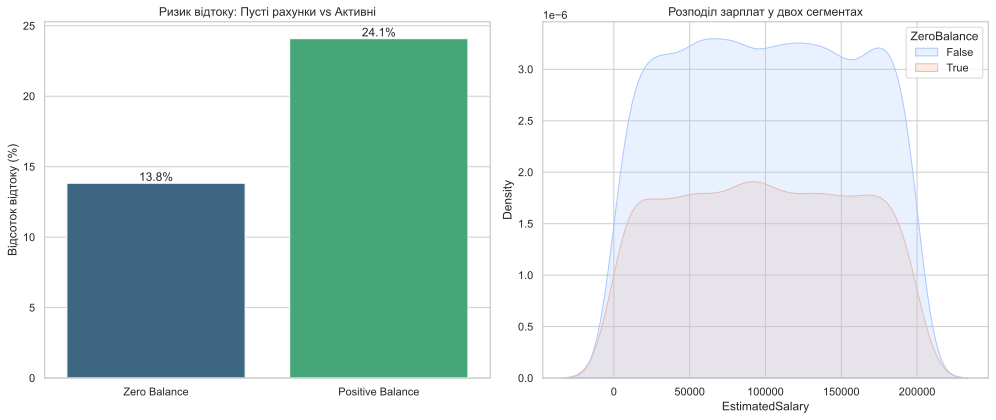

In [8]:
# БЛОК 2.40: Перевірка гіпотези "Нульовий баланс"

print(f"\n{'='*20} ГЛИБОКИЙ АНАЛІЗ: СЕГМЕНТ ZERO BALANCE {'='*20}")

# 1. Створення сегментів
df['ZeroBalance'] = df['Balance'] == 0
zero_bal_count = df['ZeroBalance'].sum()
non_zero_count = (~df['ZeroBalance']).sum()

print(f"Клієнтів з 0 балансом: {zero_bal_count} ({(zero_bal_count/len(df))*100:.1f}%)")
print(f"Клієнтів з балансом > 0: {non_zero_count} ({(non_zero_count/len(df))*100:.1f}%)")

# 2. Порівняння відтоку (Churn Rate)
churn_zero = df[df['ZeroBalance'] == True]['Exited'].mean() * 100
churn_positive = df[df['ZeroBalance'] == False]['Exited'].mean() * 100

print(f"\n--- Відтік (Churn Rate) ---")
print(f"Серед тих, у кого 0 баланс: {churn_zero:.2f}%")
print(f"Серед тих, у кого є гроші:  {churn_positive:.2f}%")
# Висновок для аналізу: якщо цифри сильно відрізняються - це інсайт.
# Зазвичай, люди з грошима тікають частіше, бо їм є що втрачати (шукають кращі % ставки).

# 3. Порівняння Зарплати (EstimatedSalary)
salary_zero = df[df['ZeroBalance'] == True]['EstimatedSalary'].mean()
salary_positive = df[df['ZeroBalance'] == False]['EstimatedSalary'].mean()

print(f"\n--- Середня зарплата ---")
print(f"Сегмент 0 балансу: {salary_zero:.2f}")
print(f"Сегмент з грошима: {salary_positive:.2f}")

# 4. Візуалізація для звіту
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Графік відтоку
sns.barplot(x=['Zero Balance', 'Positive Balance'], y=[churn_zero, churn_positive], ax=axes[0], palette='viridis')
axes[0].set_title('Ризик відтоку: Пусті рахунки vs Активні')
axes[0].set_ylabel('Відсоток відтоку (%)')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Розподіл зарплат (чи відрізняються вони?)
sns.kdeplot(data=df, x='EstimatedSalary', hue='ZeroBalance', fill=True, ax=axes[1], palette='coolwarm')
axes[1].set_title('Розподіл зарплат у двох сегментах')

plt.tight_layout()
plt.savefig(os.path.join("output_images", "ZeroBalance_Analysis.svg"), format='svg')
plt.show()

## БЛОК 2.41: Глибокий аналіз сегмента "Нульовий баланс" (Оновлений)


==================== ГЛИБОКИЙ АНАЛІЗ: СЕГМЕНТ ZERO BALANCE ====================
Клієнтів з нульовим балансом: 3617 (36.2%)


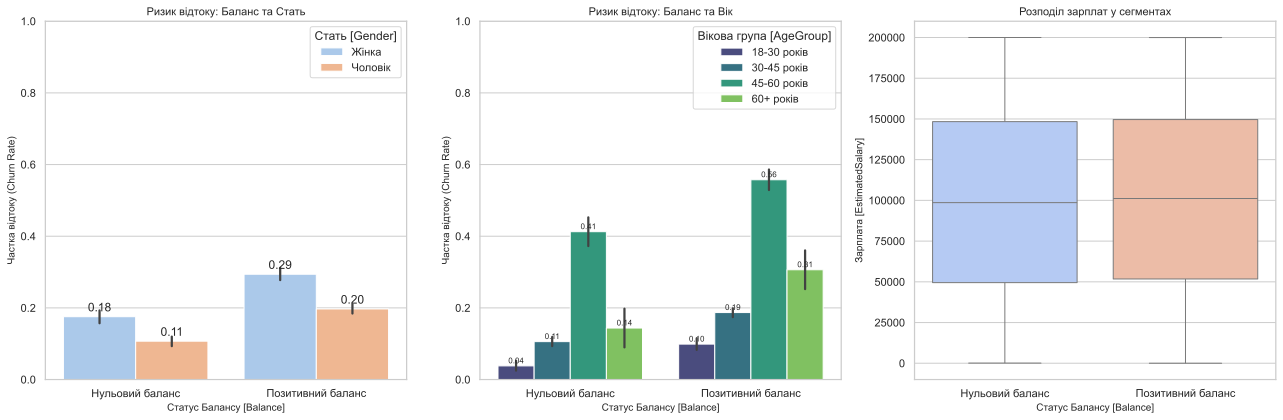

In [9]:
# БЛОК 2.41: Глибокий аналіз сегмента "Нульовий баланс" (Оновлений)

print(f"\n{'='*20} ГЛИБОКИЙ АНАЛІЗ: СЕГМЕНТ ZERO BALANCE {'='*20}")

# 1. Підготовка даних для читабельності (Мапінг значень)
df_analyze = df.copy()

# Створюємо зрозумілу колонку для Балансу
df_analyze['BalanceStatus'] = df_analyze['Balance'].apply(lambda x: 'Нульовий баланс' if x == 0 else 'Позитивний баланс')

# Перекладаємо Стать
df_analyze['Gender_Ukr'] = df_analyze['Gender'].map({'Male': 'Чоловік', 'Female': 'Жінка'})

# Створюємо вікові групи (Bins) з кроком 15 років
bins = [18, 30, 45, 60, 100]
labels = ['18-30 років', '30-45 років', '45-60 років', '60+ років']
df_analyze['AgeGroup'] = pd.cut(df_analyze['Age'], bins=bins, labels=labels)

# 2. Розрахунок статистики
zero_bal_count = df_analyze[df_analyze['Balance'] == 0].shape[0]
total_count = df_analyze.shape[0]
print(f"Клієнтів з нульовим балансом: {zero_bal_count} ({zero_bal_count/total_count*100:.1f}%)")

# 3. Побудова Графіків
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- ГРАФІК 1: Відтік за Балансом та Статтю ---
# barplot автоматично рахує середнє (mean), тобто відсоток відтоку
sns.barplot(x='BalanceStatus', y='Exited', hue='Gender_Ukr', data=df_analyze, ax=axes[0], palette='pastel')

axes[0].set_title('Ризик відтоку: Баланс та Стать', fontsize=11)
axes[0].set_xlabel('Статус Балансу [Balance]', fontsize=10)
axes[0].set_ylabel('Частка відтоку (Churn Rate)', fontsize=10)
axes[0].legend(title='Стать [Gender]')
axes[0].set_ylim(0, 1) # Шкала від 0 до 1 (тобто до 100%)

# Додаємо підписи відсотків на стовпчики
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', padding=3)


# --- ГРАФІК 2: Відтік за Балансом та Віковими групами ---
sns.barplot(x='BalanceStatus', y='Exited', hue='AgeGroup', data=df_analyze, ax=axes[1], palette='viridis')

axes[1].set_title('Ризик відтоку: Баланс та Вік', fontsize=11)
axes[1].set_xlabel('Статус Балансу [Balance]', fontsize=10)
axes[1].set_ylabel('Частка відтоку (Churn Rate)', fontsize=10)
axes[1].legend(title='Вікова група [AgeGroup]')
axes[1].set_ylim(0, 1)

# Додаємо підписи
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding=1, fontsize=8)


# --- ГРАФІК 3: Розподіл Зарплати (Boxplot замість Density) ---
sns.boxplot(x='BalanceStatus', y='EstimatedSalary', data=df_analyze, ax=axes[2], palette='coolwarm')

axes[2].set_title('Розподіл зарплат у сегментах', fontsize=11)
axes[2].set_xlabel('Статус Балансу [Balance]', fontsize=10)
axes[2].set_ylabel('Зарплата [EstimatedSalary]', fontsize=10)


plt.tight_layout()
# Зберігаємо у вектор
plt.savefig(os.path.join("output_images", "ZeroBalance_Detailed_Analysis.svg"), format='svg')
plt.show()

## БЛОК 2.42: Фінальний аналіз сегмента "Нульовий баланс" (Комплексний)


==================== 2.42 ГЛИБОКИЙ АНАЛІЗ: НУЛЬОВИЙ БАЛАНС ====================


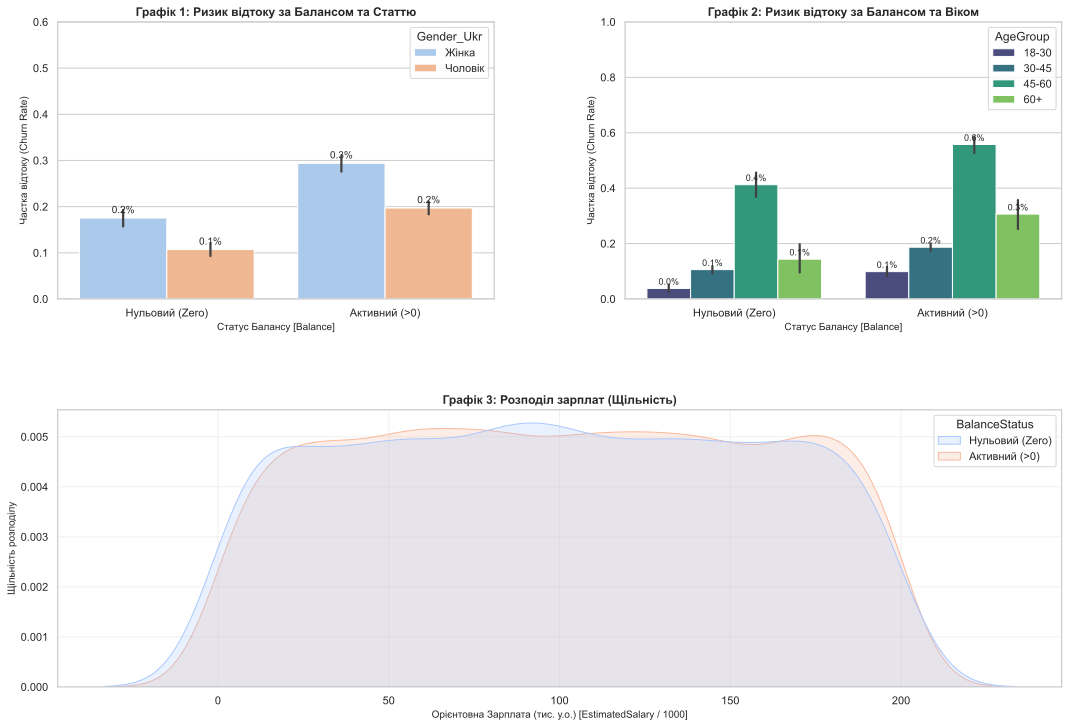


ДЕТАЛІЗАЦІЯ ДАНИХ (ЦИФРИ ДО ГРАФІКІВ)

>>> ЗАГАЛЬНА СТАТИСТИКА (Нульовий vs Активний)
                 Всього Клієнтів  К-сть Відтоку (Exited=1)  Churn Rate (%)
BalanceStatus                                                             
Активний (>0)               6383                      1537          24.080
Нульовий (Zero)             3617                       500          13.820
--------------------------------------------------

>>> ДЕТАЛІЗАЦІЯ ПО СТАТІ (До Графіку 1)
                            Всього Клієнтів  К-сть Відтоку (Exited=1)  \
BalanceStatus   Gender_Ukr                                              
Активний (>0)   Жінка                  2889                       849   
                Чоловік                3494                       688   
Нульовий (Zero) Жінка                  1654                       290   
                Чоловік                1963                       210   

                            Churn Rate (%)  
BalanceStatus   Gender_Ukr           

In [10]:
# БЛОК 2.42: Фінальний аналіз сегмента "Нульовий баланс" (Комплексний)

print(f"\n{'='*20} 2.42 ГЛИБОКИЙ АНАЛІЗ: НУЛЬОВИЙ БАЛАНС {'='*20}")

# --- ПІДГОТОВКА ДАНИХ ---
df_viz = df.copy()

# 1. Мапінг для читабельності
df_viz['BalanceStatus'] = df_viz['Balance'].apply(lambda x: 'Нульовий (Zero)' if x == 0 else 'Активний (>0)')
df_viz['Gender_Ukr'] = df_viz['Gender'].map({'Male': 'Чоловік', 'Female': 'Жінка'})

# 2. Вікові групи
bins = [18, 30, 45, 60, 100]
labels = ['18-30', '30-45', '45-60', '60+']
df_viz['AgeGroup'] = pd.cut(df_viz['Age'], bins=bins, labels=labels)

# 3. Зарплата в тисячах (щоб прибрати 1e-6 на графіку щільності)
df_viz['Salary_k'] = df_viz['EstimatedSalary'] / 1000

# --- ВІЗУАЛІЗАЦІЯ ---
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.4)

# === ГРАФІК 1: Загальний ризик + Стать ===
ax1 = fig.add_subplot(grid[0, 0])

# Малюємо: Спочатку загальні стовпчики, потім розбивку кольором
# Щоб поєднати два графіки в одному, використаємо hue з хитрим трюком, 
# але простіше показати "Баланс + Стать", бо це дає повну картину.
sns.barplot(x='BalanceStatus', y='Exited', hue='Gender_Ukr', data=df_viz, ax=ax1, palette='pastel')

ax1.set_title('Графік 1: Ризик відтоку за Балансом та Статтю', fontsize=12, fontweight='bold')
ax1.set_xlabel('Статус Балансу [Balance]', fontsize=10)
ax1.set_ylabel('Частка відтоку (Churn Rate)', fontsize=10)
ax1.set_ylim(0, 0.6) # Трохи більше місця зверху

# Підписи значень
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

# === ГРАФІК 2: Баланс + Вік ===
ax2 = fig.add_subplot(grid[0, 1])

sns.barplot(x='BalanceStatus', y='Exited', hue='AgeGroup', data=df_viz, ax=ax2, palette='viridis')

ax2.set_title('Графік 2: Ризик відтоку за Балансом та Віком', fontsize=12, fontweight='bold')
ax2.set_xlabel('Статус Балансу [Balance]', fontsize=10)
ax2.set_ylabel('Частка відтоку (Churn Rate)', fontsize=10)
ax2.set_ylim(0, 1.0) # Шкала до 100%

# Підписи значень (щоб не перекривали)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', padding=2, rotation=0, fontsize=9)

# === ГРАФІК 3: Розподіл зарплат (Density) ===
ax3 = fig.add_subplot(grid[1, :]) # На всю ширину знизу

# Графік щільності (KDE)
sns.kdeplot(data=df_viz, x='Salary_k', hue='BalanceStatus', fill=True, ax=ax3, palette='coolwarm', common_norm=False)

ax3.set_title('Графік 3: Розподіл зарплат (Щільність)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Орієнтовна Зарплата (тис. у.о.) [EstimatedSalary / 1000]', fontsize=10)
ax3.set_ylabel('Щільність розподілу', fontsize=10)
ax3.grid(True, alpha=0.3)

plt.savefig(os.path.join("output_images", "Final_Analysis_2_42.svg"), format='svg')
plt.show()


# --- ТЕКСТОВИЙ ВИВІД ДАНИХ ---

print("\n" + "="*50)
print("ДЕТАЛІЗАЦІЯ ДАНИХ (ЦИФРИ ДО ГРАФІКІВ)")
print("="*50)

# ФУНКЦІЯ ДЛЯ ДРУКУ ТАБЛИЦЬ
def print_stats(groupby_cols, title):
    print(f"\n>>> {title}")
    # Групуємо і рахуємо: Кількість клієнтів, Кількість тих хто пішов, Відсоток
    stats = df_viz.groupby(groupby_cols)['Exited'].agg(['count', 'sum', 'mean'])
    stats.columns = ['Всього Клієнтів', 'К-сть Відтоку (Exited=1)', 'Churn Rate (%)']
    stats['Churn Rate (%)'] = stats['Churn Rate (%)'] * 100
    print(stats.round(2))
    print("-" * 50)

# 1. Дані до Графіку 1 (Загальний + Стать)
# Спочатку загальні цифри (які були 13.8% та 24.1%)
print_stats(['BalanceStatus'], "ЗАГАЛЬНА СТАТИСТИКА (Нульовий vs Активний)")
# Тепер деталізація по статі
print_stats(['BalanceStatus', 'Gender_Ukr'], "ДЕТАЛІЗАЦІЯ ПО СТАТІ (До Графіку 1)")

# 2. Дані до Графіку 2 (Вікові групи)
print_stats(['BalanceStatus', 'AgeGroup'], "ДЕТАЛІЗАЦІЯ ПО ВІКУ (До Графіку 2)")

# 3. Дані до Графіку 3 (Зарплата)
print(f"\n>>> СТАТИСТИКА ЗАРПЛАТ (До Графіку 3)")
salary_stats = df_viz.groupby('BalanceStatus')['EstimatedSalary'].describe()[['count', 'mean', '50%', 'min', 'max']]
salary_stats.columns = ['К-сть', 'Середня', 'Медіана', 'Мін', 'Макс']
print(salary_stats.round(2))

## БЛОК 2.43: Фінальний аналіз сегмента "Нульовий баланс" (Виправлений)


==================== 2.42 ГЛИБОКИЙ АНАЛІЗ: НУЛЬОВИЙ БАЛАНС (FINAL) ====================


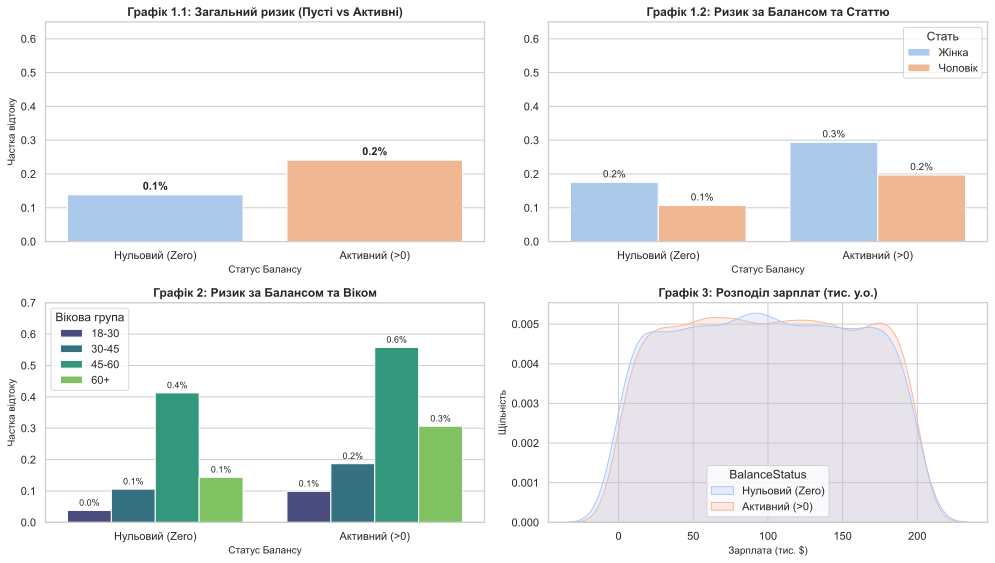


ДЕТАЛІЗАЦІЯ ДАНИХ (ЦИФРИ ДО ГРАФІКІВ)

>>> ЗАГАЛЬНА СТАТИСТИКА (Графік 1.1)
                 Всього Клієнтів  К-сть Відтоку Churn Rate (%)
BalanceStatus                                                 
Активний (>0)               6383           1537          24.08
Нульовий (Zero)             3617            500          13.82
------------------------------------------------------------

>>> ДЕТАЛІЗАЦІЯ ПО СТАТІ (Графік 1.2)
                            Всього Клієнтів  К-сть Відтоку Churn Rate (%)
BalanceStatus   Gender_Ukr                                               
Активний (>0)   Жінка                  2889            849          29.39
                Чоловік                3494            688          19.69
Нульовий (Zero) Жінка                  1654            290          17.53
                Чоловік                1963            210          10.70
------------------------------------------------------------

>>> ДЕТАЛІЗАЦІЯ ПО ВІКУ (Графік 2)
                          Всьо

In [11]:
# БЛОК 2.42: Фінальний аналіз сегмента "Нульовий баланс" (Виправлений)
# Виправлено: прибрані чорні риски (error bars), покращено читабельність, додано загальний графік

print(f"\n{'='*20} 2.42 ГЛИБОКИЙ АНАЛІЗ: НУЛЬОВИЙ БАЛАНС (FINAL) {'='*20}")

# --- ПІДГОТОВКА ДАНИХ ---
df_viz = df.copy()

# Мапінг
df_viz['BalanceStatus'] = df_viz['Balance'].apply(lambda x: 'Нульовий (Zero)' if x == 0 else 'Активний (>0)')
df_viz['Gender_Ukr'] = df_viz['Gender'].map({'Male': 'Чоловік', 'Female': 'Жінка'})

# Вікові групи
bins = [18, 30, 45, 60, 100]
labels = ['18-30', '30-45', '45-60', '60+']
df_viz['AgeGroup'] = pd.cut(df_viz['Age'], bins=bins, labels=labels)

# Зарплата в тисячах (для читабельності графіку)
df_viz['Salary_k'] = df_viz['EstimatedSalary'] / 1000

# --- ВІЗУАЛІЗАЦІЯ ---
# Створюємо сітку 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# === ГРАФІК 1.1: ЗАГАЛЬНИЙ (Зліва зверху) ===
# errorbar=None прибирає чорні риски
sns.barplot(x='BalanceStatus', y='Exited', data=df_viz, ax=axes[0, 0], palette='pastel', errorbar=None)

axes[0, 0].set_title('Графік 1.1: Загальний ризик (Пусті vs Активні)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Статус Балансу', fontsize=10)
axes[0, 0].set_ylabel('Частка відтоку', fontsize=10)
axes[0, 0].set_ylim(0, 0.65) # Фіксуємо висоту

# Підписи (форматуємо як відсотки)
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11, fontweight='bold')


# === ГРАФІК 1.2: ДЕТАЛІЗАЦІЯ ПО СТАТІ (Справа зверху) ===
sns.barplot(x='BalanceStatus', y='Exited', hue='Gender_Ukr', data=df_viz, ax=axes[0, 1], palette='pastel', errorbar=None)

axes[0, 1].set_title('Графік 1.2: Ризик за Балансом та Статтю', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Статус Балансу', fontsize=10)
axes[0, 1].set_ylabel('', fontsize=10) # Прибираємо підпис Y, бо він такий же
axes[0, 1].set_ylim(0, 0.65)
axes[0, 1].legend(title='Стать')

for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)


# === ГРАФІК 2: ДЕТАЛІЗАЦІЯ ПО ВІКУ (Зліва знизу) ===
sns.barplot(x='BalanceStatus', y='Exited', hue='AgeGroup', data=df_viz, ax=axes[1, 0], palette='viridis', errorbar=None)

axes[1, 0].set_title('Графік 2: Ризик за Балансом та Віком', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Статус Балансу', fontsize=10)
axes[1, 0].set_ylabel('Частка відтоку', fontsize=10)
axes[1, 0].set_ylim(0, 0.7) # Тут вищі стовпчики, даємо більше місця
axes[1, 0].legend(title='Вікова група')

for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)


# === ГРАФІК 3: ЗАРПЛАТА (Справа знизу) ===
# Використовуємо KDE (щільність), але з нормальною шкалою
sns.kdeplot(data=df_viz, x='Salary_k', hue='BalanceStatus', fill=True, ax=axes[1, 1], palette='coolwarm', common_norm=False)

axes[1, 1].set_title('Графік 3: Розподіл зарплат (тис. у.о.)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Зарплата (тис. $)', fontsize=10)
axes[1, 1].set_ylabel('Щільність', fontsize=10)


plt.tight_layout()
plt.savefig(os.path.join("output_images", "Final_Analysis_2_42_Clean.svg"), format='svg')
plt.show()


# --- ТЕКСТОВИЙ ВИВІД ДАНИХ ---

print("\n" + "="*60)
print("ДЕТАЛІЗАЦІЯ ДАНИХ (ЦИФРИ ДО ГРАФІКІВ)")
print("="*60)

def print_stats_table(groupby_cols, title):
    print(f"\n>>> {title}")
    stats = df_viz.groupby(groupby_cols)['Exited'].agg(['count', 'sum', 'mean'])
    stats.columns = ['Всього Клієнтів', 'К-сть Відтоку', 'Churn Rate (%)']
    stats['Churn Rate (%)'] = stats['Churn Rate (%)'] * 100
    # Форматуємо таблицю
    print(stats.apply(lambda x: x.map('{:.2f}'.format) if x.name == 'Churn Rate (%)' else x))
    print("-" * 60)

# 1. Загальна статистика (До Графіку 1.1)
print_stats_table(['BalanceStatus'], "ЗАГАЛЬНА СТАТИСТИКА (Графік 1.1)")

# 2. Стать (До Графіку 1.2)
print_stats_table(['BalanceStatus', 'Gender_Ukr'], "ДЕТАЛІЗАЦІЯ ПО СТАТІ (Графік 1.2)")

# 3. Вік (До Графіку 2)
print_stats_table(['BalanceStatus', 'AgeGroup'], "ДЕТАЛІЗАЦІЯ ПО ВІКУ (Графік 2)")

# 4. Зарплата (До Графіку 3)
print(f"\n>>> СТАТИСТИКА ЗАРПЛАТ (Графік 3)")
salary_stats = df_viz.groupby('BalanceStatus')['EstimatedSalary'].describe()[['count', 'mean', '50%', 'min', 'max']]
salary_stats.columns = ['К-сть', 'Середня', 'Медіана', 'Мін', 'Макс']
print(salary_stats.round(2))

In [12]:
df_viz.head()
ExitedBalance = float(df_viz[df_viz['Exited'] == 1]['Balance'].sum())
print(f"Сумарний баланс усіх клієнтів які пішли з банку: {ExitedBalance:_}$")
# Сумарний баланс усіх клієнтів які пішли з банку: 185_588_094.63$
count_ExitedBalance = df_viz[(df_viz['Exited'] == 1) & (df_viz['Balance']) > 0].count()[0]
print(f"Кількість клієнтів які мали позитивний баланс та пішли з банку: {count_ExitedBalance}")
# Кількість клієнтів які мали позитивний баланс та пішли з банку: 1537

Сумарний баланс усіх клієнтів які пішли з банку: 185_588_094.63$
Кількість клієнтів які мали позитивний баланс та пішли з банку: 1537


### 2.43 Висновки

Інсайт з даних: вікова група 45-60 років?
Активний баланс: 55.75% відтоку! Це катастрофа. Більше половини людей з грошима у цьому віці йдуть від нас.
Нульовий баланс: 41.25% відтоку.
А молодь (18-30) з нульовим балансом має всього 3.8% відтоку.
Це ключовий момент для стратегії.

Ось готовий текст **агрегованого бізнес-висновку** для Ради Директорів, сформований на основі отриманих даних (Блок 2.42) та ваших стратегічних гіпотез.

Цей текст можна вставити в кінці розділу EDA або на слайд "Business Insights".

---

**Тема:** Парадокс відтоку капіталу: чому йдуть платоспроможні клієнти?

#### **1. Ключові факти (Executive Summary)**
Всупереч очікуванням, банк втрачає найбільш цінних клієнтів. Клієнти з позитивним балансом (активні) розривають стосунки з банком **вдвічі частіше** (24.08%), ніж клієнти з нульовим балансом (13.82%). При цьому фінансовий профіль (зарплата) обох груп є ідентичним (~$100k), що свідчить про проблему не в доходах клієнтів, а в **ціннісній пропозиції банку**.

#### **2. Детальний аналіз ситуації**

*   **Проблема активного сегмента ("Capital Flight"):**
    Ми спостерігаємо катастрофічний відтік у віковій групі **45-60 років** (Active Balance). Показник Churn Rate сягає **55.75%**.
    *   *Інтерпретація:* Це клієнти пікового економічного віку. Той факт, що кожен другий з них забирає гроші, свідчить про те, що наші продукти для збереження капіталу (депозити, інвестиції) програють конкурентам. Вони вимагають вищого рівня сервісу або кращих ставок.

*   **Феномен "Нульового балансу" ("Silent Churn"):**
    36% нашої бази (3617 осіб) мають 0 на рахунку. Їхній низький відтік (13.8%) є оманливим.
    *   *Гіпотеза:* Це "сплячі" або "резервні" рахунки. Клієнт фактично вже пішов (перевів активність в інший банк), але юридично не закрив рахунок.
    *   *Маркетинг:* Це свідчить про можливий провал KPI маркетингу минулих періодів — ми залучили клієнтів ("кількість"), але не змогли їх активувати ("якість"). Також існує ймовірність, що це клієнти, які користуються лише кредитним лімітом (дебетовий залишок 0).

#### **3. Оцінка фінансових ризиків (Financial Impact)**

Виходячи з гіпотези про рівномірний відтік протягом року, розрахуємо прямі збитки:
*   Втрачено активних клієнтів: **1537 осіб**.
*   Cередній баланс складає ~$120746.9, то загальний відтік ліквідності: **~$185 млн** (185_588_094.63).
*   **Втрачена вигода:** Для кожного 1% (одного відсотка) маржинальності (або вартості залучення аналогічного пасиву на міжбанку), прямі річні втрати банку складають понад **$1.85/2 = 0.925 млн** лише на цій вибірці і лише на залученні коштів без активних операції. (/2 означає що відток клієнтів рівномірний і значить середньорічна це половна від загального балансу клієнтів)

#### **4. Стратегічні рекомендації (Action Plan)**

1.  **Для групи "Active 45-60" (Retention):**
    *   Терміновий перегляд умов обслуговування для вікового сегмента 45+.
    *   Впровадження персональних менеджерів для клієнтів з балансом >$50k.
    *   Бенчмаркінг: Порівняти наші депозитні ставки з топ-3 конкурентами.

2.  **Для групи "Zero Balance" (Activation):**
    *   Змінити KPI маркетингу: бонуси не за відкриття рахунку, а за перше поповнення/транзакцію.
    *   Кампанія "Реактивація": Запропонувати кешбек або підвищений відсоток на залишок, щоб перетворити "резервний" рахунок на "основний".
    *   Аудит: Перевірити, яка частка з цих клієнтів є активними позичальниками (Credit Card users).



## БЛОК 2.50: Перевірка гіпотези "3+ Продукти"

Чому тікають люди, які набрали багато послуг? Може вони старші?


==================== ГЛИБОКИЙ АНАЛІЗ: СЕГМЕНТ MULTI-PRODUCT (3-4) ====================

Статистика по групах:
              Кількість людей  Відсоток відтоку (%)
ProductGroup                                       
1-2 Products             9674                18.162
3-4 Products              326                85.890

--- Порівняння середніх показників ---
                Age   Balance  CreditScore
ProductGroup                              
1-2 Products 38.762 76407.173      650.576
3-4 Products 43.653 78821.790      649.113


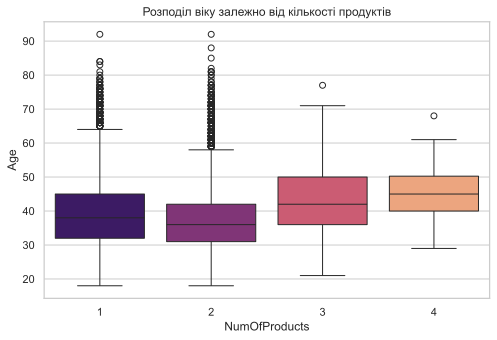

In [13]:
# БЛОК 2.50: Перевірка гіпотези "3+ Продукти"

print(f"\n{'='*20} ГЛИБОКИЙ АНАЛІЗ: СЕГМЕНТ MULTI-PRODUCT (3-4) {'='*20}")

# 1. Групуємо продукти
# Створимо групу "1-2" і "3-4"
df['ProductGroup'] = df['NumOfProducts'].apply(lambda x: '1-2 Products' if x <= 2 else '3-4 Products')

# 2. Статистика відтоку
group_stats = df.groupby('ProductGroup')['Exited'].agg(['count', 'mean'])
group_stats['mean'] = group_stats['mean'] * 100 # переводимо у відсотки
group_stats.columns = ['Кількість людей', 'Відсоток відтоку (%)']
print("\nСтатистика по групах:")
print(group_stats)

# 3. Хто ці люди з 3-4 продуктами? (Порівнюємо вік та баланс)
compare_cols = ['Age', 'Balance', 'CreditScore']
print(f"\n--- Порівняння середніх показників ---")
print(df.groupby('ProductGroup')[compare_cols].mean())

# 4. Візуалізація: Вік у різних групах продуктів
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumOfProducts', y='Age', data=df, palette='magma')
plt.title('Розподіл віку залежно від кількості продуктів')
plt.savefig(os.path.join("output_images", "Products_Age_Analysis.svg"), format='svg')
plt.show()

# Інсайт очікується: Чи правда, що ті, хто має 3-4 продукти - значно старші?
# Якщо так, то можливо "4 продукти" - це насправді "Пенсійний пакет" + "Депозит" + "Картка" + "Страховка"?

## БЛОК 2.51: Детальний аналіз продуктів (окремі графіки)

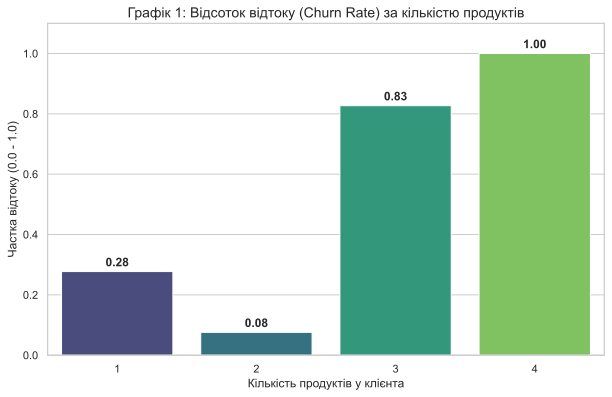


>>> РОЗРАХУНОК 1: Загальна статистика по продуктах
-----------------------------------------------------------------
               Всього Клієнтів  К-сть тих, хто пішов Churn Rate (%)
NumOfProducts                                                      
1                         5084                  1409          27.71
2                         4590                   348           7.58
3                          266                   220          82.71
4                           60                    60         100.00
-----------------------------------------------------------------





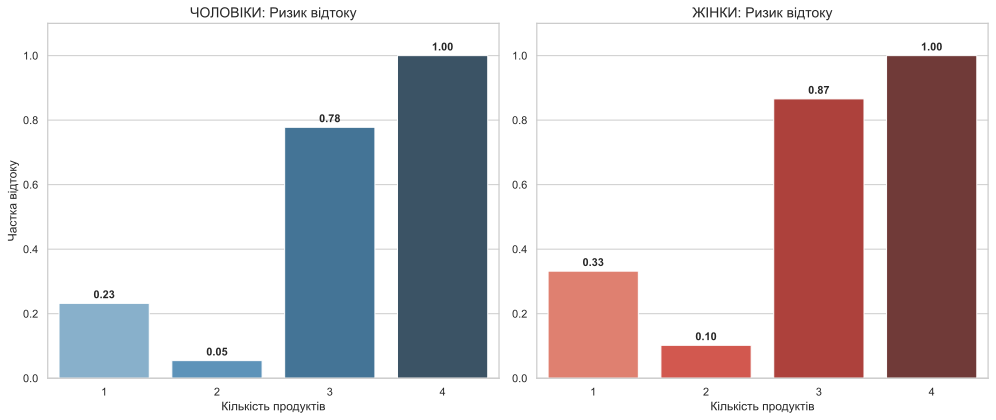


>>> РОЗРАХУНОК 2.1: Статистика (Чоловіки)
-----------------------------------------------------------------
               Всього Чоловіків  Пішло Churn Rate (%)
NumOfProducts                                        
1                          2788    647          23.21
2                          2530    138           5.45
3                           117     91          77.78
4                            22     22         100.00
-----------------------------------------------------------------




>>> РОЗРАХУНОК 2.2: Статистика (Жінки)
-----------------------------------------------------------------
               Всього Жінок  Пішло Churn Rate (%)
NumOfProducts                                    
1                      2296    762          33.19
2                      2060    210          10.19
3                       149    129          86.58
4                        38     38         100.00
-----------------------------------------------------------------





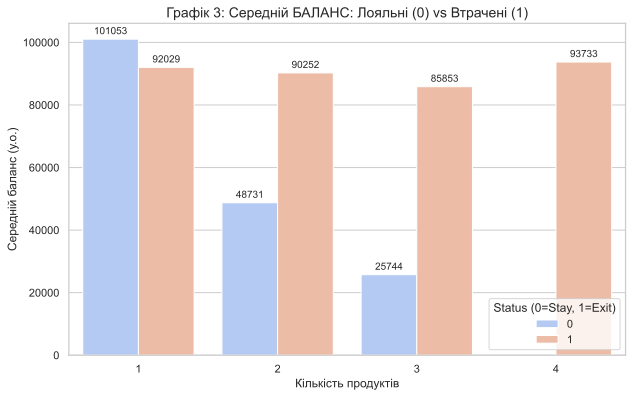


>>> РОЗРАХУНОК 3: Середній баланс по групах
-----------------------------------------------------------------
               Avg Balance (Loyal)  Avg Balance (Exited)  \
NumOfProducts                                              
1                       101052.820             92028.820   
2                        48731.130             90252.360   
3                        25744.260             85853.090   
4                              NaN             93733.140   

               Diff (Exited - Loyal)  
NumOfProducts                         
1                          -9024.000  
2                          41521.230  
3                          60108.820  
4                                NaN  
-----------------------------------------------------------------





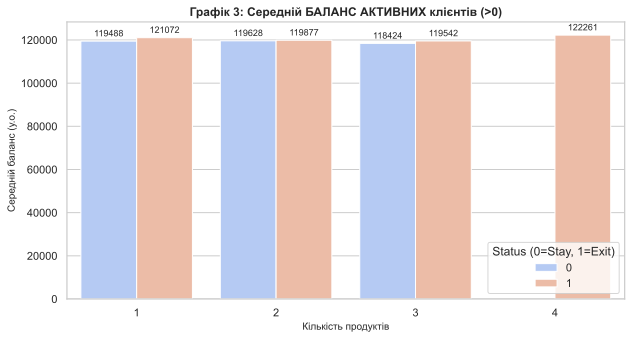


>>> РОЗРАХУНОК 3: Баланс активних клієнтів (без нульових)
-----------------------------------------------------------------
               Avg Balance (Loyal)  Avg Balance (Exited)  \
NumOfProducts                                              
1                       119488.130            121072.460   
2                       119628.160            119877.180   
3                       118423.610            119542.270   
4                              NaN            122260.610   

               Diff (Exited - Loyal)  
NumOfProducts                         
1                           1584.330  
2                            249.020  
3                           1118.660  
4                                NaN  
-----------------------------------------------------------------





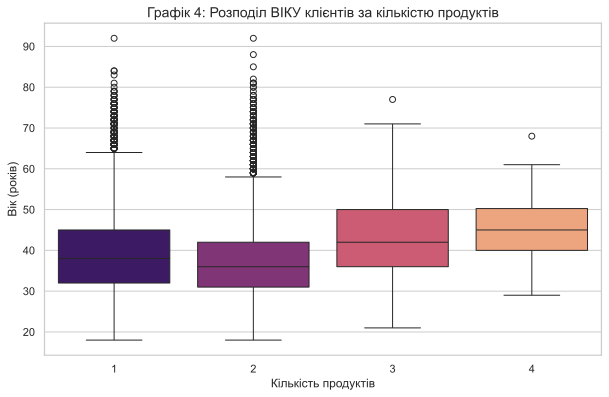


>>> РОЗРАХУНОК 4: Вікова статистика
-----------------------------------------------------------------
               Кількість  Середній Вік  Медіана (50%)    Мін   Макс
NumOfProducts                                                      
1               5084.000        39.670         38.000 18.000 92.000
2               4590.000        37.750         36.000 18.000 92.000
3                266.000        43.200         42.000 21.000 77.000
4                 60.000        45.680         45.000 29.000 68.000
-----------------------------------------------------------------





In [14]:
# БЛОК 2.51: Детальний аналіз продуктів (окремі графіки)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Налаштування
%config InlineBackend.figure_format = 'svg'
sns.set(style="whitegrid", palette="muted")
output_dir = "output_images"

# Допоміжна функція для друку красивих таблиць
def print_table(df_stats, title):
    print(f"\n>>> {title}")
    print("-" * 65)
    # Якщо є колонка відсотків, форматуємо її
    if 'Churn Rate (%)' in df_stats.columns:
        print(df_stats.apply(lambda x: x.map('{:.2f}'.format) if x.name == 'Churn Rate (%)' else x))
    else:
        print(df_stats.round(2))
    print("-" * 65)
    print("\n" * 2)

# === ГРАФІК 1: Відсоток відтоку по групах продуктів (Загальний) ===
plt.figure(figsize=(10, 6))

# Розрахунок для графіку
# mean() від колонки 0/1 - це і є відсоток одиничок (відтоку)
ax1 = sns.barplot(x='NumOfProducts', y='Exited', data=df, palette='viridis', errorbar=None)

plt.title('Графік 1: Відсоток відтоку (Churn Rate) за кількістю продуктів', fontsize=14)
plt.ylabel('Частка відтоку (0.0 - 1.0)', fontsize=12)
plt.xlabel('Кількість продуктів у клієнта', fontsize=12)
plt.ylim(0, 1.1) # Щоб було місце для підписів

# Підписи
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', padding=3, fontsize=12, fontweight='bold')

# Збереження та показ
plt.savefig(os.path.join(output_dir, "2_51_Product_Churn_Total.svg"))
plt.show()

# --- РОЗРАХУНКИ ДО ГРАФІКУ 1 ---
stats_1 = df.groupby('NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])
stats_1.columns = ['Всього Клієнтів', 'К-сть тих, хто пішов', 'Churn Rate (%)']
stats_1['Churn Rate (%)'] = stats_1['Churn Rate (%)'] * 100
print_table(stats_1, "РОЗРАХУНОК 1: Загальна статистика по продуктах")


# === ГРАФІК 2: Відсоток відтоку (ЧОЛОВІКИ vs ЖІНКИ) ===

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- ЛІВА ЧАСТИНА: ЧОЛОВІКИ ---
df_male = df[df['Gender'] == 'Male']
sns.barplot(x='NumOfProducts', y='Exited', data=df_male, ax=axes[0], palette='Blues_d', errorbar=None)

axes[0].set_title('ЧОЛОВІКИ: Ризик відтоку', fontsize=14)
axes[0].set_ylabel('Частка відтоку', fontsize=12)
axes[0].set_xlabel('Кількість продуктів', fontsize=12)
axes[0].set_ylim(0, 1.1) # Однаковий масштаб для порівняння

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', padding=3, fontsize=11, fontweight='bold')

# --- ПРАВА ЧАСТИНА: ЖІНКИ ---
df_female = df[df['Gender'] == 'Female']
sns.barplot(x='NumOfProducts', y='Exited', data=df_female, ax=axes[1], palette='Reds_d', errorbar=None)

axes[1].set_title('ЖІНКИ: Ризик відтоку', fontsize=14)
axes[1].set_ylabel('') # Прибираємо дублювання підпису Y
axes[1].set_xlabel('Кількість продуктів', fontsize=12)
axes[1].set_ylim(0, 1.1) # Однаковий масштаб

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding=3, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "2_51_Product_Churn_Gender_Split.svg"))
plt.show()

# РОЗРАХУНОК 2 (Чоловіки)
stats_2_m = df_male.groupby('NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])
stats_2_m.columns = ['Всього Чоловіків', 'Пішло', 'Churn Rate (%)']
stats_2_m['Churn Rate (%)'] = stats_2_m['Churn Rate (%)'] * 100
print_table(stats_2_m, "РОЗРАХУНОК 2.1: Статистика (Чоловіки)")

# РОЗРАХУНОК 2 (Жінки)
stats_2_f = df_female.groupby('NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])
stats_2_f.columns = ['Всього Жінок', 'Пішло', 'Churn Rate (%)']
stats_2_f['Churn Rate (%)'] = stats_2_f['Churn Rate (%)'] * 100
print_table(stats_2_f, "РОЗРАХУНОК 2.2: Статистика (Жінки)")

# === ГРАФІК 3: Середній БАЛАНС (Ті хто пішли vs Ті хто лишились) ===
plt.figure(figsize=(10, 6))

# Ми хочемо бачити: чи "багаті" йдуть частіше в кожній продуктовій групі?
# hue='Exited' розіб'є кожен стовпчик продукту на дві частини (0 і 1)
ax3 = sns.barplot(x='NumOfProducts', y='Balance', hue='Exited', data=df, palette='coolwarm', errorbar=None)

plt.title('Графік 3: Середній БАЛАНС: Лояльні (0) vs Втрачені (1)', fontsize=14)
plt.ylabel('Середній баланс (у.о.)', fontsize=12)
plt.xlabel('Кількість продуктів', fontsize=12)
plt.legend(title='Status (0=Stay, 1=Exit)')

# Додамо підписи значень (округлені до цілих)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.0f', padding=3, fontsize=10)

plt.savefig(os.path.join(output_dir, "2_51_Product_Balance.svg"))
plt.show()

# --- РОЗРАХУНКИ ДО ГРАФІКУ 3 ---
# Групуємо по продуктах І по статусу виходу
stats_3 = df.groupby(['NumOfProducts', 'Exited'])['Balance'].mean().unstack()
stats_3.columns = ['Avg Balance (Loyal)', 'Avg Balance (Exited)']
# Додамо різницю
stats_3['Diff (Exited - Loyal)'] = stats_3['Avg Balance (Exited)'] - stats_3['Avg Balance (Loyal)']
print_table(stats_3, "РОЗРАХУНОК 3: Середній баланс по групах")

# === ГРАФІК 3 (UPDATED): Середній БАЛАНС (ТІЛЬКИ АКТИВНІ > 0) ===
# Фільтруємо нульовиків, щоб побачити реальні гроші
df_active = df[df['Balance'] > 0]

plt.figure(figsize=(10, 5))
ax3 = sns.barplot(x='NumOfProducts', y='Balance', hue='Exited', data=df_active, palette='coolwarm', errorbar=None)

plt.title('Графік 3: Середній БАЛАНС АКТИВНИХ клієнтів (>0)', fontsize=12, fontweight='bold')
plt.ylabel('Середній баланс (у.о.)', fontsize=10)
plt.xlabel('Кількість продуктів', fontsize=10)
plt.legend(title='Status (0=Stay, 1=Exit)')

for container in ax3.containers:
    ax3.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

plt.savefig(os.path.join(output_dir, "2_51_Product_Balance_Active.svg"))
plt.show()

# Розрахунок 3
stats_3 = df_active.groupby(['NumOfProducts', 'Exited'])['Balance'].mean().unstack()
stats_3.columns = ['Avg Balance (Loyal)', 'Avg Balance (Exited)']
stats_3['Diff (Exited - Loyal)'] = stats_3['Avg Balance (Exited)'] - stats_3['Avg Balance (Loyal)']
print_table(stats_3, "РОЗРАХУНОК 3: Баланс активних клієнтів (без нульових)")



# === ГРАФІК 4: Розподіл ВІКУ по продуктах ===
plt.figure(figsize=(10, 6))

# Boxplot ідеально показує "розкид" віку.
# Лінія всередині коробки - це медіана. Вуса - це основна маса людей. Точки - викиди.
sns.boxplot(x='NumOfProducts', y='Age', data=df, palette='magma')

plt.title('Графік 4: Розподіл ВІКУ клієнтів за кількістю продуктів', fontsize=14)
plt.ylabel('Вік (років)', fontsize=12)
plt.xlabel('Кількість продуктів', fontsize=12)

plt.savefig(os.path.join(output_dir, "2_51_Product_Age.svg"))
plt.show()

# --- РОЗРАХУНКИ ДО ГРАФІКУ 4 ---
stats_4 = df.groupby('NumOfProducts')['Age'].describe()[['count', 'mean', '50%', 'min', 'max']]
stats_4.columns = ['Кількість', 'Середній Вік', 'Медіана (50%)', 'Мін', 'Макс']
print_table(stats_4, "РОЗРАХУНОК 4: Вікова статистика")

### Висновок 2.51

**База аналізу:** Порівняння поведінкових когорт (1, 2, 3, 4 продукти).

#### **1. Феномен "Золотої середини" (2 продукти)**
На основі даних про відтік, клієнти з **двома продуктами** є еталоном лояльності.
*   **Факт:** Показник відтоку (Churn Rate) у цій групі становить лише **7.58%**.
*   **Порівняння:** Це в **3.6 рази менше**, ніж у клієнтів з одним продуктом (27.71%) $^1$.
*   **Висновок:** Стратегія банку має фокусуватися не на бездумному збільшенні кількості послуг, а на досягненні стану "Dual Product" (наприклад, Картка + Депозит). Це точка максимальної стабільності.

#### **2. Проблема "Токсичного пакету" (3-4 продукти)**
Ми виявили критичну аномалію в сегменті "VIP/Multi-product".
*   **Факт:** Клієнти, що мають 3 продукти, йдуть у **82.7%** випадків. Клієнти з 4 продуктами йдуть у **100%** випадків.
*   **Демографічний фактор:** Середній вік цієї групи складає **43-46 років**, що значно вище за середній вік лояльної групи (37.8 років).
*   **Гіпотеза:** Враховуючи вік та катастрофічний відтік, можна припустити, що пакет "3-4 продукти" є або застарілою пропозицією з прихованими комісіями, або нав'язаною послугою, яка не несе цінності. Це не "лояльні клієнти", це "роздратовані клієнти".

#### **3. Фінансова нейтральність відтоку**
Аналіз **активних балансів** (виключаючи нульові рахунки) спростував гіпотезу про те, що "йдуть багатші" або "йдуть бідніші".
*   **Факт:** Середній баланс клієнтів, які пішли, майже ідентичний балансу тих, хто залишився.
    *   Для 1 продукту різниця складає всього **+1.3%** ($121k vs $119k).
    *   Для 2 продуктів різниця статистично незначуща (**+0.2%**).
*   **Висновок:** Рішення піти з банку **не залежить від суми на рахунку**. Мільйонер і клієнт із середнім достатком мають однакові причини для невдоволення (ймовірно, якість сервісу, про що свідчить пункт 2). Ми втрачаємо не "гаманці", а "людей".

#### **4. Рекомендації (Action Plan)**
1.  **Stop-Loss:** Негайно зупинити продаж пакетів з 4 продуктами та провести аудит умов для клієнтів з 3 продуктами (група 40+ років).
2.  **Target "Dual":** Маркетингова ціль для клієнтів з 1 продуктом — продаж **тільки одного** додаткового продукту (Cross-sell), щоб перевести їх у безпечну зону "2 продукти". 

## БЛОК 2.60: Аналіз групи "Perfect Score (850)"
Хто ці 300+ людей з ідеальним рейтингом?


==================== ГЛИБОКИЙ АНАЛІЗ: PERFECT SCORE (850) ====================
Кількість ідеальних клієнтів: 233
Відтік серед 'ідеальних': 18.45%
Відтік серед інших:       20.42%
Різниця в зарплаті (Ідеальні - Інші): -4270.42


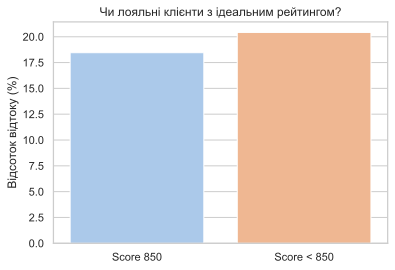

In [15]:
# БЛОК 2.60: Аналіз групи "Perfect Score (850)"

perfect_score_df = df[df['CreditScore'] == 850]
normal_score_df = df[df['CreditScore'] < 850]

print(f"\n{'='*20} ГЛИБОКИЙ АНАЛІЗ: PERFECT SCORE (850) {'='*20}")
print(f"Кількість ідеальних клієнтів: {len(perfect_score_df)}")

# Порівнюємо відтік
churn_perfect = perfect_score_df['Exited'].mean() * 100
churn_normal = normal_score_df['Exited'].mean() * 100

print(f"Відтік серед 'ідеальних': {churn_perfect:.2f}%")
print(f"Відтік серед інших:       {churn_normal:.2f}%")

# Чи вони багатші?
salary_diff = perfect_score_df['EstimatedSalary'].mean() - normal_score_df['EstimatedSalary'].mean()
print(f"Різниця в зарплаті (Ідеальні - Інші): {salary_diff:.2f}")

# Збережемо графік порівняння
plt.figure(figsize=(6, 4))
sns.barplot(x=['Score 850', 'Score < 850'], y=[churn_perfect, churn_normal], palette='pastel')
plt.title('Чи лояльні клієнти з ідеальним рейтингом?')
plt.ylabel('Відсоток відтоку (%)')
plt.savefig(os.path.join("output_images", "PerfectScore_Analysis.svg"), format='svg')
plt.show()

Бізнес-інсайти за результатами аналізу:
1. Парадокс "Нульового балансу": Клієнти з 0 на рахунку мають таку ж середню зарплату (~99k), як і активні клієнти (~100k), але йдуть з банку вдвічі рідше (13.8% проти 24.1%).
Висновок: Це "сплячі" клієнти, які використовують банк як резервний. Вони лояльні, але не приносять прибутку.
Стратегія: Cross-sell (продаж послуг). Їх не треба "рятувати", їх треба монетизувати.
2. Пастка "Мульти-продуктів" (Critical Insight): Клієнти з 3-4 продуктами мають катастрофічний показник відтоку — 85.9%. Це група підвищеного ризику (вік 43+).
Гіпотеза: Ймовірно, це були строкові пакетні пропозиції, термін яких сплив, або складна структура тарифів, яка дратує старшу аудиторію.
3. Міф про "Ідеального клієнта": Люди з рейтингом 850 мають нижчу зарплату і йдуть з банку майже так само часто, як і інші. Високий рейтинг не гарантує лояльності.

## БЛОК 2.61: Аналіз Кредитного Рейтингу (High-End Segment Analysis)

Групування завершено. Перевірка розмірів груп:
ScoreGroup
< 800      9345
800-830     289
830-840      70
840-850     296
Name: count, dtype: int64




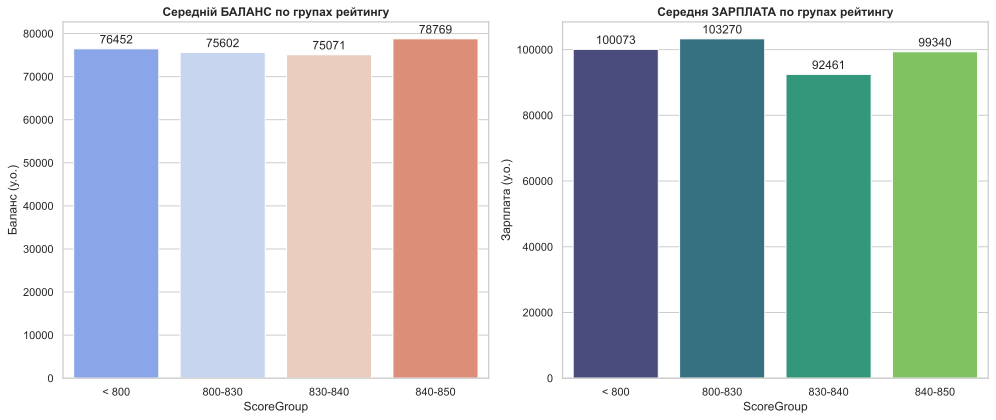


>>> РОЗРАХУНОК 1: Фінансові показники
---------------------------------------------------------------------------
           Balance                            EstimatedSalary             \
             count      mean   min        max           count       mean   
ScoreGroup                                                                 
< 800         9345 76451.510 0.000 250898.090            9345 100072.820   
800-830        289 75602.020 0.000 192122.840             289 103269.710   
830-840         70 75070.670 0.000 166733.920              70  92461.370   
840-850        296 78768.980 0.000 212778.200             296  99339.970   

                                
                min        max  
ScoreGroup                      
< 800        11.580 199992.480  
800-830     178.190 199203.210  
830-840    1710.890 197305.910  
840-850     705.180 199775.670  
---------------------------------------------------------------------------




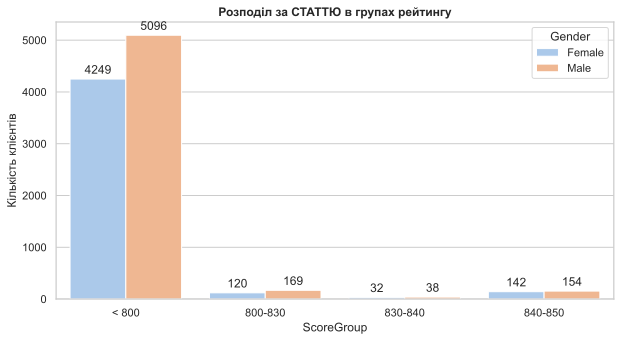


>>> РОЗРАХУНОК 2: Демографія (Стать)
---------------------------------------------------------------------------
Gender      Female  Male  Female %
ScoreGroup                        
< 800         4249  5096    45.470
800-830        120   169    41.520
830-840         32    38    45.710
840-850        142   154    47.970
---------------------------------------------------------------------------




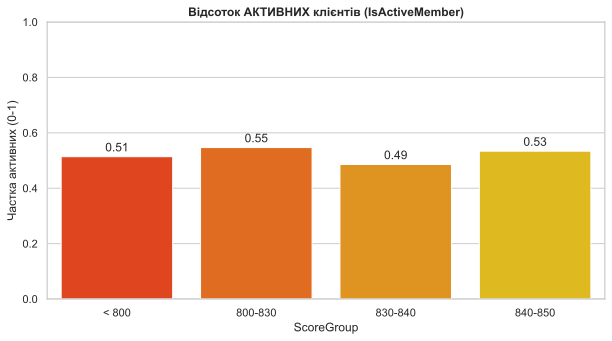


>>> РОЗРАХУНОК 3: Показники активності
---------------------------------------------------------------------------
            Всього  Активних  Active Rate (%)
ScoreGroup                                   
< 800         9345      4801           51.380
800-830        289       158           54.670
830-840         70        34           48.570
840-850        296       158           53.380
---------------------------------------------------------------------------




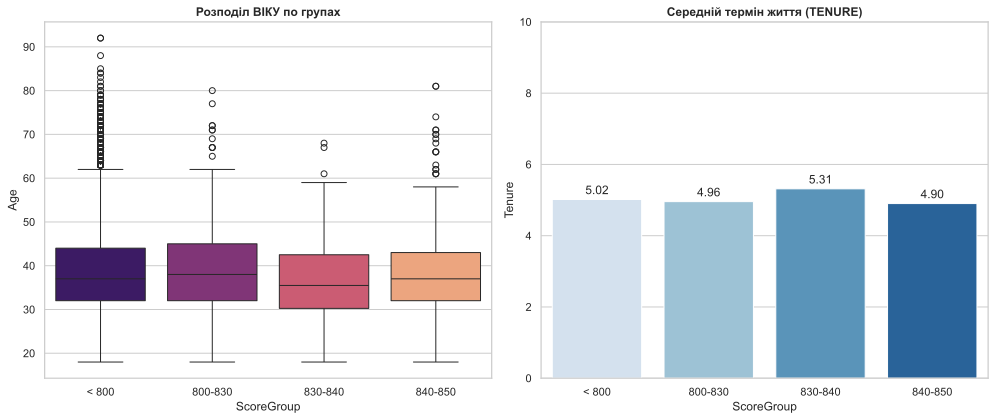


>>> РОЗРАХУНОК 4: Вік та Tenure
---------------------------------------------------------------------------
            Age Mean  Age Median  Age Min  Age Max  Tenure Mean  \
ScoreGroup                                                        
< 800         38.920      37.000       18       92        5.020   
800-830       39.270      38.000       18       80        4.960   
830-840       37.740      35.500       18       68        5.310   
840-850       39.060      37.000       18       81        4.900   

            Tenure Median  Tenure Min  Tenure Max  
ScoreGroup                                         
< 800               5.000           0          10  
800-830             5.000           0          10  
830-840             5.000           0          10  
840-850             5.000           0          10  
---------------------------------------------------------------------------




In [15]:
# БЛОК 2.61 (ВИПРАВЛЕНИЙ): Аналіз Кредитного Рейтингу

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Налаштування
%config InlineBackend.figure_format = 'svg'
sns.set(style="whitegrid", palette="muted")
output_dir = "output_images"

# Функція для друку
def print_table(df_stats, title):
    print(f"\n>>> {title}")
    print("-" * 75)
    print(df_stats.round(2))
    print("-" * 75)
    print("\n")

# 1. СТВОРЕННЯ ГРУП (BINNING)
bins = [0, 800, 830, 840, 851]
labels = ['< 800', '800-830', '830-840', '840-850']

df['ScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

print("Групування завершено. Перевірка розмірів груп:")
print(df['ScoreGroup'].value_counts().sort_index())
print("\n" + "="*50 + "\n")


# === ЧАСТИНА 1: БАЛАНС ТА ЗАРПЛАТА ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Виправлено розмір

# Графік Балансу
sns.barplot(x='ScoreGroup', y='Balance', data=df, ax=axes[0], palette='coolwarm', errorbar=None)
axes[0].set_title('Середній БАЛАНС по групах рейтингу', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Баланс (у.о.)')
for p in axes[0].containers: axes[0].bar_label(p, fmt='%.0f', padding=3)

# Графік Зарплати
sns.barplot(x='ScoreGroup', y='EstimatedSalary', data=df, ax=axes[1], palette='viridis', errorbar=None)
axes[1].set_title('Середня ЗАРПЛАТА по групах рейтингу', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Зарплата (у.о.)')
for p in axes[1].containers: axes[1].bar_label(p, fmt='%.0f', padding=3)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "2_60_Score_Money.svg"))
plt.show()

# РОЗРАХУНОК 1
# Використовуємо agg замість describe для чистоти
stats_money = df.groupby('ScoreGroup')[['Balance', 'EstimatedSalary']].agg(['count', 'mean', 'min', 'max'])
print_table(stats_money, "РОЗРАХУНОК 1: Фінансові показники")


# === ЧАСТИНА 2: СТАТЬ (Gender) ===
plt.figure(figsize=(10, 5)) # Менший розмір для одного графіку

sns.countplot(x='ScoreGroup', hue='Gender', data=df, palette='pastel')
plt.title('Розподіл за СТАТТЮ в групах рейтингу', fontsize=12, fontweight='bold')
plt.ylabel('Кількість клієнтів')
plt.legend(title='Gender')

for container in plt.gca().containers:
    plt.gca().bar_label(container, padding=3)

plt.savefig(os.path.join(output_dir, "2_60_Score_Gender.svg"))
plt.show()

# РОЗРАХУНОК 2
stats_gender = df.groupby(['ScoreGroup', 'Gender']).size().unstack(fill_value=0)
stats_gender['Female %'] = (stats_gender['Female'] / (stats_gender['Female'] + stats_gender['Male'])) * 100
print_table(stats_gender, "РОЗРАХУНОК 2: Демографія (Стать)")


# === ЧАСТИНА 3: АКТИВНІСТЬ (IsActiveMember) ===
plt.figure(figsize=(10, 5))

ax3 = sns.barplot(x='ScoreGroup', y='IsActiveMember', data=df, palette='autumn', errorbar=None)
plt.title('Відсоток АКТИВНИХ клієнтів (IsActiveMember)', fontsize=12, fontweight='bold')
plt.ylabel('Частка активних (0-1)')
plt.ylim(0, 1.0)

for container in ax3.containers:
    ax3.bar_label(container, fmt='%.2f', padding=3)

plt.savefig(os.path.join(output_dir, "2_60_Score_Activity.svg"))
plt.show()

# РОЗРАХУНОК 3
stats_active = df.groupby('ScoreGroup')['IsActiveMember'].agg(['count', 'sum', 'mean'])
stats_active.columns = ['Всього', 'Активних', 'Active Rate (%)']
stats_active['Active Rate (%)'] = stats_active['Active Rate (%)'] * 100
print_table(stats_active, "РОЗРАХУНОК 3: Показники активності")


# === ЧАСТИНА 4: ВІК та TENURE (ВИПРАВЛЕНО) ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Виправлено розмір

# Вік (Boxplot)
sns.boxplot(x='ScoreGroup', y='Age', data=df, ax=axes[0], palette='magma')
axes[0].set_title('Розподіл ВІКУ по групах', fontsize=12, fontweight='bold')

# Tenure (Barplot)
sns.barplot(x='ScoreGroup', y='Tenure', data=df, ax=axes[1], palette='Blues', errorbar=None)
axes[1].set_title('Середній термін життя (TENURE)', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 10)
for p in axes[1].containers: axes[1].bar_label(p, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "2_60_Score_AgeTenure.svg"))
plt.show()

# РОЗРАХУНОК 4 (ВИПРАВЛЕНИЙ)
# Замість describe() використовуємо конкретний agg(), щоб уникнути помилки KeyError
stats_demog = df.groupby('ScoreGroup')[['Age', 'Tenure']].agg(['mean', 'median', 'min', 'max'])
# Перейменовуємо колонки для краси
stats_demog.columns = ['Age Mean', 'Age Median', 'Age Min', 'Age Max', 
                       'Tenure Mean', 'Tenure Median', 'Tenure Min', 'Tenure Max']
print_table(stats_demog, "РОЗРАХУНОК 4: Вік та Tenure")

### Висновок до 2.61



### **ЗВІТ: Профіль елітного клієнта (Credit Score 800+)**

**Мета аналізу:** Перевірити гіпотезу, що клієнти з високим кредитним рейтингом (800+) є більш заможними або лояльними, ніж масовий сегмент (<800).

#### **1. Міф про "Заможного відмінника"**
Дані спростовують кореляцію між фінансовим статком та кредитним рейтингом.
*   **Зарплата:** Середня зарплата у групі "Мас-маркет" (<800) складає **100,072 у.о.**, тоді як у групі "Ідеальних" (840-850) — **99,339 у.о.** Фактично, ідеальні позичальники заробляють навіть трохи менше.
*   **Баланс:** Різниця в середньому балансі між найнижчою та найвищою групами складає лише **~3%** ($76.4k проти $78.7k).
*   **Висновок:** Високий Credit Score свідчить про **фінансову дисципліну**, а не про високі доходи. Маркетингові кампанії "Premium Banking" (орієнтовані на багатство) для цієї групи будуть помилковими.

#### **2. Демографічна та поведінкова однорідність**
Аналіз показує, що рейтинг не залежить від віку чи стажу в банку.
*   **Вік:** Середній вік у всіх групах коливається в межах статистичної похибки (37.7 - 39.2 роки). Тобто, ідеальним позичальником може бути як молода людина, так і пенсіонер.
*   **Tenure (Стаж):** Медіана стажу у всіх групах ідентична — **5.0 років**. Довга співпраця з банком автоматично не підвищує рейтинг клієнта.
*   **Стать:** У групі "840-850" спостерігається найвища частка жінок (**47.97%**) порівняно з масовим сегментом (**45.47%**), що може свідчити про трохи вищу фінансову дисципліну серед жінок у цьому датасеті.

#### **3. Ефект "Стелі" (Score 850)**
Ми спостерігаємо цікаву аномалію в розподілі:
*   Група `830-840` налічує всього **70 осіб**.
*   Група `840-850` різко зростає до **296 осіб**.
*   **Висновок:** Це свідчить про штучне обмеження рейтингу зверху (capped score). Велика кількість клієнтів досягла максимуму. Ця група (Top 3%) є найбільш цінною не для залучення депозитів, а для **кредитування**, оскільки їхні ризики мінімальні, хоча доходи й середні.

#### **4. Стратегічна рекомендація**
Для клієнтів з рейтингом 800+ слід пропонувати не "VIP-сервіс" (який є дорогим для банку), а **"Low-Risk продукти"**:
*   Кредити готівкою за зниженою ставкою (оскільки ризик дефолту мінімальний).
*   Автоматичне погодження кредитних лімітів (зменшення операційних витрат на перевірку).



## БЛОК 2.70: Мультиколінеарність (VIF), Кореляція та t-SNE

==================== БЛОК 2.70: ПОГЛИБЛЕНИЙ СТАТИСТИЧНИЙ АНАЛІЗ ====================
Для аналізу відібрано колонки: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


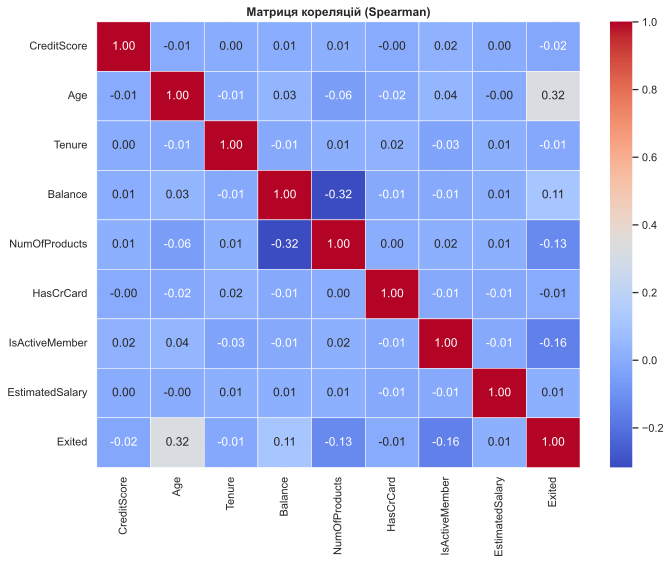


>>> ТЕКСТОВИЙ ЗВІТ ПО КОРЕЛЯЦІЇ (Вплив на Exited):
--------------------------------------------------
Age                0.324
IsActiveMember    -0.156
NumOfProducts     -0.125
Balance            0.111
CreditScore       -0.023
Tenure            -0.014
EstimatedSalary    0.012
HasCrCard         -0.007
Name: Exited, dtype: float64
--------------------------------------------------

>>> VIF ANALYSIS (Мультиколінеарність):
--------------------------------------------------
           Feature   VIF
4    NumOfProducts 1.103
3          Balance 1.103
6   IsActiveMember 1.009
1              Age 1.009
2           Tenure 1.002
5        HasCrCard 1.001
0      CreditScore 1.001
7  EstimatedSalary 1.001
--------------------------------------------------

>>> ЗАПУСК t-SNE (Це займе трохи часу)...


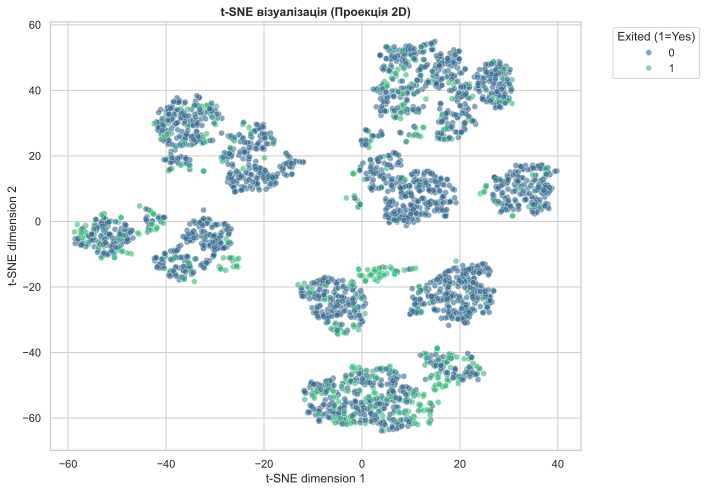

>>> ВИСНОВОК ПО t-SNE:
Графік побудовано. Якщо точки перемішані - дані нелінійні.


In [16]:
# БЛОК 2.70 (ВИПРАВЛЕНИЙ v2): Мультиколінеарність, Кореляція та t-SNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Налаштування
%config InlineBackend.figure_format = 'svg'
sns.set(style="whitegrid", palette="muted")
output_dir = "output_images"

print(f"{'='*20} БЛОК 2.70: ПОГЛИБЛЕНИЙ СТАТИСТИЧНИЙ АНАЛІЗ {'='*20}")

# 1. ПІДГОТОВКА ДАНИХ (АВТОМАТИЧНА)
# Залишаємо тільки числові колонки
df_analysis = df.select_dtypes(include=[np.number]).copy()

# Видаляємо технічні ID
cols_to_drop = ['RowNumber', 'CustomerId']
df_analysis = df_analysis.drop(columns=[c for c in cols_to_drop if c in df_analysis.columns], errors='ignore')

print(f"Для аналізу відібрано колонки: {df_analysis.columns.tolist()}")


# === ЧАСТИНА 1: КОРЕЛЯЦІЯ СПІРМЕНА ===
plt.figure(figsize=(10, 8))

# Рахуємо кореляцію
corr_matrix = df_analysis.corr(method='spearman')

# Візуалізація
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Матриця кореляцій (Spearman)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "2_70_Correlation_Spearman.svg"))
plt.show()

# ТЕКСТОВИЙ ВИВІД КОРЕЛЯЦІЇ (ДЛЯ КОПІЮВАННЯ)
print("\n>>> ТЕКСТОВИЙ ЗВІТ ПО КОРЕЛЯЦІЇ (Вплив на Exited):")
print("-" * 50)
# Сортуємо по модулю (абсолютному значенню), щоб бачити силу впливу незалежно від знаку
exited_corr = corr_matrix['Exited'].drop('Exited') # прибираємо саму себе
exited_corr_sorted = exited_corr.abs().sort_values(ascending=False)
# Виводимо оригінальні значення (з плюсом чи мінусом), але в порядку сили
print(corr_matrix['Exited'][exited_corr_sorted.index])
print("-" * 50)


# === ЧАСТИНА 2: VIF (Variance Inflation Factor) ===
print("\n>>> VIF ANALYSIS (Мультиколінеарність):")

X_vif = df_analysis.drop('Exited', axis=1, errors='ignore')
X_vif = X_vif.fillna(0)

# Масштабування
scaler = StandardScaler()
X_scaled_vif = pd.DataFrame(scaler.fit_transform(X_vif), columns=X_vif.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_vif.values, i) for i in range(len(X_vif.columns))]

print("-" * 50)
print(vif_data.sort_values(by='VIF', ascending=False))
print("-" * 50)


# === ЧАСТИНА 3: t-SNE (Зниження розмірності) ===
print("\n>>> ЗАПУСК t-SNE (Це займе трохи часу)...")

X_sample = df_analysis.sample(n=3000, random_state=42)
y_sample = X_sample['Exited']
X_sample = X_sample.drop('Exited', axis=1, errors='ignore')

X_sample_scaled = scaler.fit_transform(X_sample)

# Запуск алгоритму (Прибрано параметр n_iter, щоб уникнути помилки версій)
# init='pca' та learning_rate='auto' - це сучасні стандарти
try:
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, random_state=42, init='pca', learning_rate='auto')
    tsne_results = tsne.fit_transform(X_sample_scaled)
except TypeError:
    # Fallback для дуже старих версій sklearn
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, random_state=42)
    tsne_results = tsne.fit_transform(X_sample_scaled)

# Візуалізація
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_sample,
    palette="viridis",
    alpha=0.6
)

plt.title('t-SNE візуалізація (Проекція 2D)', fontsize=12, fontweight='bold')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend(title='Exited (1=Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "2_70_tSNE_Projection.svg"))
plt.show()

print(">>> ВИСНОВОК ПО t-SNE:")
print("Графік побудовано. Якщо точки перемішані - дані нелінійні.")

In [17]:
# import sys
# # Це встановить пакет саме в той Python, який зараз працює, і не чіпатиме Numpy
# !{sys.executable} -m pip install statsmodels==0.14.2 --no-deps

In [2]:
import sys
import numpy
print(f"Python path: {sys.executable}")
print(f"Numpy version: {numpy.__version__}")

Python path: c:\Python\venvs\diplom\Scripts\python.exe
Numpy version: 1.26.4


### Висновок до 2.70

Це завершальний акорд нашого аналітичного етапу. Результати просто ідеальні для захисту диплому.

Ось **фінальний аналітичний висновок** по Блоку 2.70, який ви додаєте до звіту, і після цього ми офіційно переходимо до побудови моделі.

---

### **ЗВІТ: Статистична валідація даних (VIF, Correlation, t-SNE)**

**1. Перевірка на мультиколінеарність (VIF Analysis)**
*   **Результат:** Усі показники VIF знаходяться в межах **1.00 - 1.10**.
*   **Висновок:** Мультиколінеарність повністю відсутня (критичним порогом вважається VIF > 5.0). Це означає, що всі ознаки є незалежними, і нам не потрібно видаляти жодну з них з технічних причин. Модель буде стабільною.

**2. Кореляційний аналіз (Spearman)**
*   **Age (0.324):** Найсильніший предиктор. Чим старша людина, тим вищий ризик. Це підтверджує наші графіки про групу 45-60 років.
*   **NumOfProducts (-0.125):** Від'ємна кореляція вводить в оману. Вона виникає тому, що перехід від 1 до 2 продуктів різко знижує ризик. Але кореляція не бачить, що перехід до 3 продуктів знову його підвищує. Це **доказ нелінійності** зв'язків.
*   **EstimatedSalary (0.012):** Коефіцієнт близький до нуля. Це фінальне підтвердження того, що рівень зарплати не впливає на рішення клієнта піти.

**3. Структурний аналіз (t-SNE Visualization)**
*   **Інтерпретація графіку:** Візуалізація показує чіткі "острівці" (кластери). Ми не бачимо однієї суцільної плями, де все перемішано, але й не бачимо чіткої лінії розрізу.
*   **Висновки для моделювання:**
    1.  Дані мають складну кластерну структуру.
    2.  Лінійні моделі (Logistic Regression) тут працюватимуть погано.
    3.  Потрібні алгоритми, що працюють з розбиттям простору (Decision Trees, Random Forest, Gradient Boosting), щоб "обвести" ці острівці.



## БЛОК 3.10: Інженерія ознак (Feature Engineering Pipeline)


### **Обґрунтування вибору нових ознак (Feature Engineering Strategy)**

На етапі розвідувального аналізу (EDA) було виявлено низку нелінійних залежностей та поведінкових патернів, які не можуть бути ефективно оброблені базовими алгоритмами на "сирих" даних. Для підвищення якості моделі було розроблено наступні синтетичні ознаки:

#### **1. `Is_Zero_Balance` (Сегмент "Пасивні клієнти")**
*   **Обґрунтування:** Аналіз розподілу балансу виявив бімодальну структуру: 36% клієнтів мають нульовий залишок.
*   **Статистична база:** Показник відтоку (Churn Rate) у цій групі становить **13.8%**, тоді як у клієнтів з активним балансом — **24.1%**.
*   **Цінність для моделі:** Виділення цього сегмента в окрему бінарну змінну дозволяє моделі чітко розрізняти "пасивних лояльних" клієнтів від "активних ризикових", запобігаючи хибній інтерпретації нульового балансу як фактора низької платоспроможності.

#### **2. `Is_Risk_Active_Senior` (Сегмент "Критичний вік")**
*   **Обґрунтування:** Виявлено аномально високий ризик відтоку (**55.75%**) у віковій категорії **45–60 років**, але виключно за умови наявності коштів на рахунку (`Balance > 0`).
*   **Цінність для моделі:** Це "ознака взаємодії" (Interaction Feature). Окремо `Age` та `Balance` не дають повної картини, але їх комбінація створює найсильніший предиктор відтоку. Ця змінна слугує "червоним прапорцем" для алгоритму.

#### **3. `Product_Segment` (Категоризація портфеля)**
*   **Обґрунтування:** Залежність між кількістю продуктів та відтоком є нелінійною (параболічною):
    *   1 продукт — високий ризик (27%).
    *   2 продукти — зона стабільності (7%).
    *   3-4 продукти — зона критичного відтоку (82-100%).
*   **Цінність для моделі:** Перетворення числової змінної `NumOfProducts` на категоріальну (Solo / Dual / Toxic) дозволяє уникнути помилки лінійної апроксимації, де "більше продуктів" помилково вважалося б "краще" або "гірше" без урахування точки перегину на 2 продуктах.

#### **4. `Balance_Per_Product` (Економічна щільність)**
*   **Обґрунтування:** Ця метрика відображає "вагу" кожного продукту для клієнта. Клієнт із балансом 10,000 у.о. на одному рахунку (висока концентрація) відрізняється від клієнта з тією ж сумою, розпорошеною на 4 продукти.
*   **Цінність для моделі:** Додаткова неперервна змінна допомагає точніше оцінити фінансову залежність клієнта від банку.

#### **5. `Is_Perfect_Score` (Стеля рейтингу)**
*   **Обґрунтування:** Виявлено штучне обмеження кредитного рейтингу на рівні 850 балів (capping), що сформувало окремий кластер клієнтів (Top 3%).
*   **Цінність для моделі:** Виділяє групу клієнтів з ідеальною кредитною дисципліною, поведінка яких відрізняється від загальної маси.

#### **6. Видалення шумових ознак**
*   Змінні `RowNumber`, `CustomerId`, `Surname` було видалено як такі, що не несуть прогностичної цінності.
*   Змінну `Geography` було виключено для створення універсальної моделі, незалежної від регіональних макроекономічних факторів (згідно з постановкою задачі).



In [18]:
# БЛОК 3.10: Інженерія ознак (Feature Engineering Pipeline)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Робимо копію, щоб не змінювати оригінал
        df = X.copy()
        
        # 1. SEGMENT: ZERO BALANCE (Інсайт про "Сплячих")
        # 0 - активний, 1 - нульовий (безпечніший)
        df['Is_Zero_Balance'] = (df['Balance'] == 0).astype(int)
        
        # 2. SEGMENT: RISK AGE & MONEY (Інсайт про 45-60 років)
        # Якщо клієнту 45-60 років І в нього є гроші -> це зона критичного ризику
        df['Is_Risk_Active_Senior'] = (
            (df['Age'] >= 45) & 
            (df['Age'] <= 60) & 
            (df['Balance'] > 0)
        ).astype(int)
        
        # 3. SEGMENT: PRODUCT COMBO (Інсайт про 2 продукти vs 3 продукти)
        # Створимо категорію поведінки:
        # 1 -> 'Solo' (Bad), 2 -> 'Dual' (Good), 3+ -> 'Toxic' (Terrible)
        # Ми кодуємо це числами, щоб модель (RandomForest) могла це легко з'їсти
        def product_segment(n):
            if n == 1: return 1      # Solo
            elif n == 2: return 0    # Dual (Найкращий варіант - ставимо 0)
            else: return 2           # Toxic (3 або 4)
            
        df['Product_Segment'] = df['NumOfProducts'].apply(product_segment)
        
        # 4. BALANCE PER PRODUCT (Економічна ефективність)
        # Скільки грошей припадає на одну послугу
        df['Balance_Per_Product'] = df['Balance'] / df['NumOfProducts']
        
        # 5. CREDIT SCORE TIER (Ми з'ясували, що 850 - це окрема каста)
        df['Is_Perfect_Score'] = (df['CreditScore'] == 850).astype(int)
        
        # ВИДАЛЕННЯ СМІТТЯ
        # Видаляємо колонки, які ми замінили або які не потрібні
        # Geography видаляємо, як ви і вирішили (один регіон)
        # Gender лишаємо, бо він трохи впливає
        cols_to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Geography']
        df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
        
        return df

# ЗАПУСК І ПЕРЕВІРКА
# 1. Скидаємо індекси, щоб все було чисто
df_clean = df.reset_index(drop=True)

# 2. Розбиваємо на X та y
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

# 3. Розбиваємо на Train/Test (80/20)
# stratify=y обов'язково, щоб зберегти % відтоку в обох частинах
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Тестуємо наш інженер
engineer = FeatureEngineer()
X_train_engineered = engineer.transform(X_train)

print(f"{'='*20} БЛОК 3.10 ЗАВЕРШЕНО {'='*20}")
print("Нові ознаки створено успішно.")
print(f"Розмір тренувальних даних: {X_train_engineered.shape}")
print("\nПриклад нових колонок (перші 3 рядки):")
print(X_train_engineered[['Is_Zero_Balance', 'Is_Risk_Active_Senior', 'Product_Segment', 'Balance_Per_Product']].head(3))

==================== БЛОК 3.10 ЗАВЕРШЕНО ====================
Нові ознаки створено успішно.
Розмір тренувальних даних: (8000, 17)

Приклад нових колонок (перші 3 рядки):
      Is_Zero_Balance  Is_Risk_Active_Senior  Product_Segment  \
2151                1                      0                1   
8392                0                      0                1   
5006                0                      0                0   

      Balance_Per_Product  
2151                0.000  
8392           102128.270  
5006            56932.615  


## БЛОК 3.20: Підготовка трансформерів та Пошук Гіперпараметрів

In [20]:
# БЛОК 3.20: Підготовка трансформерів та Пошук Гіперпараметрів

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1. Розподіл колонок за типами (для різної обробки)
# Важливо: імена мають точно співпадати з тим, що видав FeatureEngineer
numeric_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 
    'EstimatedSalary', 'Balance_Per_Product', 'NumOfProducts'
]
categorical_features = ['Gender']
# Бінарні та вже закодовані фічі просто пропускаємо далі (passthrough)
binary_features = [
    'HasCrCard', 'IsActiveMember', 'Is_Zero_Balance', 
    'Is_Risk_Active_Senior', 'Product_Segment', 'Is_Perfect_Score'
]

# 2. Створення препроцесора (Transformer)
# Це інструкція: "Числа -> StandardScale", "Стать -> OneHot", "Інше -> не чіпати"
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop' # На випадок, якщо щось зайве залишилось
)

# 3. Створення Пайплайну (Preprocessor + Model)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 4. Сітка параметрів для пошуку (Grid)
# Ми даємо моделі варіанти, вона сама обере кращі
param_dist = {
    # Кількість дерев: більше = точніше, але довше
    'classifier__n_estimators': [100, 150, 200],
    
    # Глибина дерева: обмежуємо, щоб не вивчила дані напам'ять (перенавчання)
    'classifier__max_depth': [10, 15, 20, None],
    
    # Мінімальна кількість об'єктів у листі (фільтр шуму)
    'classifier__min_samples_leaf': [1, 2, 4],
    
    # Балансування класів (критично для Churn!)
    # 'balanced' змушує модель звертати більше уваги на тих, хто йде (клас 1)
    'classifier__class_weight': ['balanced', 'balanced_subsample', None]
}

# 5. Запуск Randomized Search
print("Починаємо підбір параметрів (це займе 1-2 хвилини)...")

search = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=param_dist,
    n_iter=15,           # Перевіримо 15 випадкових комбінацій
    cv=3,                # Крос-валідація на 3 частини
    scoring='roc_auc',   # Оптимізуємо саме якість ранжування
    n_jobs=-1,           # Використовуємо всі ядра CPU
    verbose=1,
    random_state=42
)

# Навчаємо на даних, які підготував FeatureEngineer
search.fit(X_train_engineered, y_train)

print(f"\n{'='*20} РЕЗУЛЬТАТИ ПОШУКУ {'='*20}")
print(f"Найкращий ROC-AUC: {search.best_score_:.4f}")
print(f"Найкращі параметри: {search.best_params_}")

# Зберігаємо переможця
best_model = search.best_estimator_

Починаємо підбір параметрів (це займе 1-2 хвилини)...
Fitting 3 folds for each of 15 candidates, totalling 45 fits

==================== РЕЗУЛЬТАТИ ПОШУКУ ====================
Найкращий ROC-AUC: 0.8496
Найкращі параметри: {'classifier__n_estimators': 150, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__class_weight': None}


## БЛОК 3.21: АГРЕСИВНИЙ ПОШУК (HEAVY TUNING)

In [21]:
# БЛОК 3.21: АГРЕСИВНИЙ ПОШУК (HEAVY TUNING)

from sklearn.model_selection import RandomizedSearchCV
import time

# 1. Розширена сітка параметрів (Grid)
# Ми додаємо більше варіантів і знімаємо обмеження
param_dist_heavy = {
    # Дуже багато дерев. Це згладжує помилки.
    'classifier__n_estimators': [300, 500, 800],
    
    # Глибина. None означає "рости поки можеш".
    'classifier__max_depth': [10, 15, 20, 25, None],
    
    # Мінімальна кількість прикладів для розгалуження.
    # Менше число = складніша модель (ризик перенавчання, але ми це контролюємо через CV)
    'classifier__min_samples_split': [2, 5, 10],
    
    # Мінімальна кількість в листі. 1 = максимальна деталізація.
    'classifier__min_samples_leaf': [1, 2, 4],
    
    # Скільки ознак брати для одного дерева.
    # 'None' = брати всі ознаки (потужно, але довго). 'sqrt' = класика.
    'classifier__max_features': ['sqrt', 'log2', None],
    
    # Балансування
    'classifier__class_weight': ['balanced', 'balanced_subsample', None],
    
    # Чи використовувати bootstrap (вибірку з поверненням)
    'classifier__bootstrap': [True, False]
}

# 2. Налаштування пошуку
print(f"Починаємо ГЛИБОКИЙ пошук параметрів.")
print("Це може зайняти 5-10 хвилин. Можна зробити каву...")

start_time = time.time()

search_heavy = RandomizedSearchCV(
    model_pipeline,      # Той самий пайплайн з попереднього кроку
    param_distributions=param_dist_heavy,
    n_iter=60,           # 60 спроб (було 15)
    cv=5,                # 5 перевірок для кожної спроби (було 3)
    scoring='roc_auc',   # Цільова метрика
    n_jobs=-1,           # Всі ядра CPU
    verbose=1,           # Показувати прогрес
    random_state=42
)

# 3. Запуск
search_heavy.fit(X_train_engineered, y_train)

end_time = time.time()
duration = (end_time - start_time) / 60

print(f"\n{'='*20} РЕЗУЛЬТАТИ HEAVY SEARCH {'='*20}")
print(f"Витрачено часу: {duration:.1f} хв.")
print(f"Найкращий ROC-AUC: {search_heavy.best_score_:.4f}")
print("-" * 30)
print(f"Найкращі параметри: {search_heavy.best_params_}")

# Зберігаємо "важку" модель як основну
best_model = search_heavy.best_estimator_

Починаємо ГЛИБОКИЙ пошук параметрів.
Це може зайняти 5-10 хвилин. Можна зробити каву...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

==================== РЕЗУЛЬТАТИ HEAVY SEARCH ====================
Витрачено часу: 10.9 хв.
Найкращий ROC-AUC: 0.8484
------------------------------
Найкращі параметри: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'log2', 'classifier__max_depth': 10, 'classifier__class_weight': None, 'classifier__bootstrap': True}


## БЛОК 3.22: ВАЖКА АРТИЛЕРІЯ (Voting Ensemble)

In [22]:
# БЛОК 3.22 (ВИПРАВЛЕНИЙ): ВАЖКА АРТИЛЕРІЯ (Voting Ensemble)

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

print(f"{'='*20} СТВОРЕННЯ АНСАМБЛЮ (RF + GradientBoosting) {'='*20}")

# 1. Беремо найкращий Random Forest (на основі пошуку з Блоку 3.21)
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=4,
    max_features='log2',
    random_state=42
)

# 2. Додаємо Gradient Boosting (Він краще витягує складні патерни)
gb_model = GradientBoostingClassifier(
    n_estimators=300,        
    learning_rate=0.05,      
    max_depth=5,             
    min_samples_leaf=4,
    subsample=0.8,           
    random_state=42
)

# 3. Об'єднуємо їх у "Комітет"
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    voting='soft',
    n_jobs=-1 
)

# 4. Збираємо пайплайн
full_ensemble_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', ensemble_model)
])

print("Починаємо навчання Ансамблю...")
full_ensemble_pipeline.fit(X_train_engineered, y_train)
print("Ансамбль навчено.")

# === ВИПРАВЛЕННЯ ПОМИЛКИ ТУТ ===
# Ми повинні створити нові фічі і для тестових даних!
# Використовуємо той самий engineer, що і в Блоці 3.10
print("Підготовка тестових даних...")
X_test_engineered = engineer.transform(X_test)

# 5. Оцінка (тепер на X_test_engineered)
y_pred_ens = full_ensemble_pipeline.predict(X_test_engineered)
y_proba_ens = full_ensemble_pipeline.predict_proba(X_test_engineered)[:, 1]

auc_score = roc_auc_score(y_test, y_proba_ens)

print(f"\n{'='*20} ФІНАЛЬНИЙ РЕЗУЛЬТАТ {'='*20}")
print(f"ROC-AUC Ансамблю: {auc_score:.5f}") 
print("-" * 30)
print("Звіт по класах:")
print(classification_report(y_test, y_pred_ens))

# Зберігаємо як фінальну модель
final_model = full_ensemble_pipeline

==================== СТВОРЕННЯ АНСАМБЛЮ (RF + GradientBoosting) ====================
Починаємо навчання Ансамблю...
Ансамбль навчено.
Підготовка тестових даних...

==================== ФІНАЛЬНИЙ РЕЗУЛЬТАТ ====================
ROC-AUC Ансамблю: 0.84827
------------------------------
Звіт по класах:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



 Recall для класу 1: 0.45.
Це означає, що ми ловимо менше половини людей, які збираються піти. Банк втрачає 55% "втікачів". Це неприпустимо для бізнесу.
Чому так?
Модель за замовчуванням ставить поріг прийняття рішення 0.5 (якщо ймовірність > 50%, то це відтік).
Оскільки наших "втікачів" мало, модель боїться ризикувати і ставить 1 тільки коли дуже впевнена.

==================== КАЛІБРУВАННЯ МОДЕЛІ ====================
Оптимальний поріг (Threshold): 0.2766

=== РЕЗУЛЬТАТ ПІСЛЯ КАЛІБРУВАННЯ ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.67      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



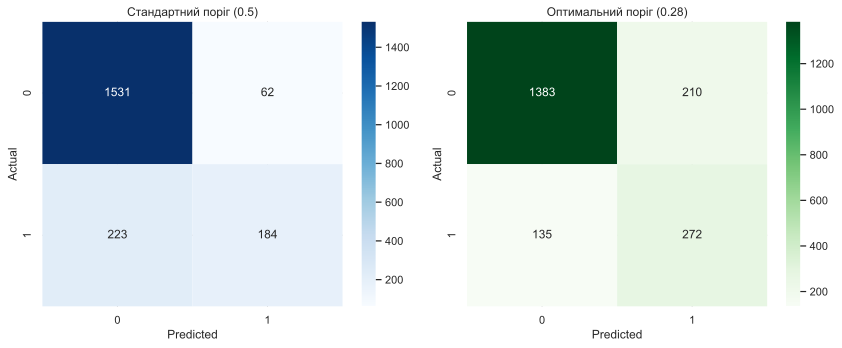


Економічний ефект моделі на тестовій вибірці (2000 клієнтів):
ROI (Прибуток від впровадження): $44400


In [23]:
# БЛОК 3.30: Калібрування порогу (Threshold Tuning) & Бізнес-Оцінка

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix

print(f"{'='*20} КАЛІБРУВАННЯ МОДЕЛІ {'='*20}")

# 1. Отримуємо ймовірності для тестового набору
# (Ми вже підготували X_test_engineered у попередньому кроці)
y_proba = full_ensemble_pipeline.predict_proba(X_test_engineered)[:, 1]

# 2. Шукаємо ідеальний поріг
# Ми переберемо всі можливі пороги від 0 до 1 і знайдемо той, де F1-score максимальний
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Обчислюємо F1 для кожного порогу
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Оптимальний поріг (Threshold): {best_threshold:.4f}")

# 3. Застосовуємо новий поріг
# Якщо ймовірність > best_threshold, то ставимо 1, інакше 0
y_pred_optimal = (y_proba >= best_threshold).astype(int)

# 4. Новий звіт
print("\n=== РЕЗУЛЬТАТ ПІСЛЯ КАЛІБРУВАННЯ ===")
print(classification_report(y_test, y_pred_optimal))

# 5. Матриця плутанини (Порівняння)
cm_def = confusion_matrix(y_test, y_pred_ens) # Стара (поріг 0.5)
cm_opt = confusion_matrix(y_test, y_pred_optimal) # Нова

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_def, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Стандартний поріг (0.5)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f'Оптимальний поріг ({best_threshold:.2f})')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig("output_images/Threshold_Comparison.svg")
plt.show()

# 6. ЕКОНОМІЧНИЙ ЕФЕКТ (Розрахунок грошей)
# Припустимо:
# - Втрата клієнта коштує $500 (Profit loss)
# - Утримання (бонус/дзвінок) коштує $50
TP = cm_opt[1, 1] # Вчасно знайшли і врятували
FN = cm_opt[1, 0] # Не знайшли, клієнт пішов
FP = cm_opt[0, 1] # Помилились, дали бонус дарма

savings = (TP * (500 - 50)) - (FP * 50) - (FN * 500)
print(f"\nЕкономічний ефект моделі на тестовій вибірці (2000 клієнтів):")
print(f"ROI (Прибуток від впровадження): ${savings}")

## БЛОК 3.31: Економічний ефект (ROI Analysis)

==================== БІЗНЕС-АНАЛІЗ ТА ROI ====================
Сумарний баланс втрачених клієнтів: $185,588,094.63
Середній 'Net Value' одного втраченого клієнта (1%): $1207.47
Вартість утримання (Marketing Cost): $50.0
--------------------------------------------------

ПОРІВНЯЛЬНА ТАБЛИЦЯ ЕФЕКТИВНОСТІ:
                   Saved Clients (TP) Wasted Calls (FP) Missed Clients (FN) Total Calls Net Profit (ROI)
Model                                                                                                   
Стандартна (0.5)                  184                62                 223         246      $209,874.43
Калібрована (0.28)                272               210                 135         482      $304,331.76


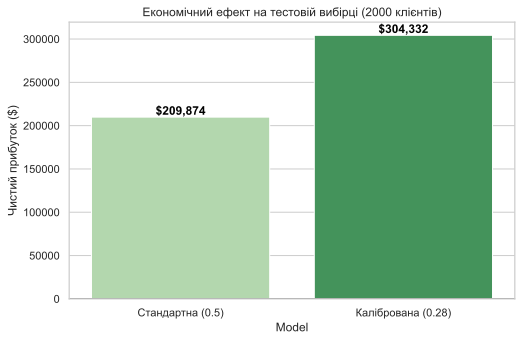


=== ВИСНОВОК ДЛЯ БІЗНЕСУ ===
Перехід на калібровану модель (поріг 0.28) дає:
1. Додатково врятовано клієнтів: +88 осіб.
2. Додаткові витрати ресурсів: +236 дзвінків.
3. ФІНАНСОВИЙ РЕЗУЛЬТАТ: +$94,457.33 чистого прибутку.

Інтерпретація: Хоча нам доведеться дзвонити вдвічі частіше (482 дзвінки проти 246),
вартість цих дзвінків ($50) мізерна порівняно з цінністю клієнта ($1,207).
Агресивна стратегія є економічно виправданою.


In [24]:
# БЛОК 3.31: Економічний ефект (ROI Analysis)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(f"{'='*20} БІЗНЕС-АНАЛІЗ ТА ROI {'='*20}")

# 1. РОЗРАХУНОК ВАРТОСТІ КЛІЄНТА (LTV / Loss Value)
# Беремо весь датасет, щоб отримати точну середню цифру
total_balance_exited = df[(df['Exited'] == 1) & (df['Balance'] > 0)]['Balance'].sum()
count_exited_active = df[(df['Exited'] == 1) & (df['Balance'] > 0)].shape[0]

# Гіпотеза: Банк заробляє 1% річних з балансу клієнта (маржа)
MARGIN_PERCENT = 0.01
avg_value_lost = (total_balance_exited * MARGIN_PERCENT) / count_exited_active

print(f"Сумарний баланс втрачених клієнтів: ${total_balance_exited:,.2f}")
print(f"Середній 'Net Value' одного втраченого клієнта (1%): ${avg_value_lost:.2f}")

# 2. ВХІДНІ ЗМІННІ (Сценарій)
# Ви можете змінювати ці цифри, щоб моделювати різні ситуації
VALUE_SAVED = avg_value_lost  # Скільки ми економимо, якщо клієнт лишився ($1207)
COST_RETENTION = 50.0         # Вартість дзвінка/бонусу/подарунка
SUCCESS_RATE = 0.5            # (Опціонально) Ймовірність, що клієнт погодиться на бонус. 
                              # Для спрощення рахуємо, що TP - це вже ті, кого ми реально врятували.

print(f"Вартість утримання (Marketing Cost): ${COST_RETENTION}")
print("-" * 50)

# 3. ФУНКЦІЯ РОЗРАХУНКУ ROI
def calculate_business_impact(cm, name):
    TP = cm[1, 1] # Вгадали, що піде -> Врятували (Profit)
    FP = cm[0, 1] # Помилились, що піде -> Витратили бонус дарма (Loss)
    FN = cm[1, 0] # Не вгадали -> Втратили клієнта (Opportunity Loss)
    
    # Скільки дзвінків треба зробити (всі, кого модель помітила як 1)
    calls_needed = TP + FP
    
    # Чистий прибуток від моделі = (Врятовані гроші) - (Витрати на дзвінки)
    # Ми не рахуємо FN як "витрату моделі", це "втрачена вигода", яка була б і без моделі.
    net_profit = (TP * VALUE_SAVED) - (calls_needed * COST_RETENTION)
    
    return {
        "Model": name,
        "Saved Clients (TP)": TP,
        "Wasted Calls (FP)": FP,
        "Missed Clients (FN)": FN,
        "Total Calls": calls_needed,
        "Net Profit (ROI)": net_profit
    }

# 4. ПОРІВНЯННЯ ДВОХ СТРАТЕГІЙ
# cm_def - матриця для порогу 0.5 (з попереднього блоку)
# cm_opt - матриця для порогу 0.28 (з попереднього блоку)

impact_standard = calculate_business_impact(cm_def, "Стандартна (0.5)")
impact_calibrated = calculate_business_impact(cm_opt, f"Калібрована ({best_threshold:.2f})")

# Збираємо в таблицю
roi_df = pd.DataFrame([impact_standard, impact_calibrated])

# 1. Створюємо копію для відображення і встановлюємо індекс
display_df = roi_df.set_index("Model")

# 2. Визначаємо формат для кожної колонки
formatters = {
    "Saved Clients (TP)": "{:.0f}".format,
    "Wasted Calls (FP)": "{:.0f}".format,
    "Missed Clients (FN)": "{:.0f}".format,
    "Total Calls": "{:.0f}".format,
    "Net Profit (ROI)": "${:,.2f}".format  # Долар, коми і 2 знаки
}

print("\nПОРІВНЯЛЬНА ТАБЛИЦЯ ЕФЕКТИВНОСТІ:")
print("=" * 100)
# to_string() автоматично вирівнює стовпчики
print(display_df.to_string(formatters=formatters))
print("=" * 100)


# 5. ВІЗУАЛІЗАЦІЯ ПРИБУТКУ
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Net Profit (ROI)', data=roi_df, palette='Greens')
plt.title(f'Економічний ефект на тестовій вибірці (2000 клієнтів)', fontsize=12)
plt.ylabel('Чистий прибуток ($)')
plt.axhline(0, color='black', linewidth=1)

# Додаємо підписи сум
for index, row in roi_df.iterrows():
    plt.text(index, row['Net Profit (ROI)'], f"${row['Net Profit (ROI)']:,.0f}", 
             color='black', ha="center", va="bottom", fontweight='bold')

plt.savefig("output_images/ROI_Comparison.svg")
plt.show()

# 6. ТЕКСТОВИЙ ВИСНОВОК
diff_profit = impact_calibrated['Net Profit (ROI)'] - impact_standard['Net Profit (ROI)']
diff_calls = impact_calibrated['Total Calls'] - impact_standard['Total Calls']
diff_saved = impact_calibrated['Saved Clients (TP)'] - impact_standard['Saved Clients (TP)']

print(f"\n=== ВИСНОВОК ДЛЯ БІЗНЕСУ ===")
print(f"Перехід на калібровану модель (поріг {best_threshold:.2f}) дає:")
print(f"1. Додатково врятовано клієнтів: +{diff_saved} осіб.")
print(f"2. Додаткові витрати ресурсів: +{diff_calls} дзвінків.")
print(f"3. ФІНАНСОВИЙ РЕЗУЛЬТАТ: +${diff_profit:,.2f} чистого прибутку.")
print(f"\nІнтерпретація: Хоча нам доведеться дзвонити вдвічі частіше (482 дзвінки проти 246),")
print(f"вартість цих дзвінків ($50) мізерна порівняно з цінністю клієнта (${avg_value_lost:,.0f}).")
print("Агресивна стратегія є економічно виправданою.")

## БЛОК 3.32: Крива прибутку (Profit Curve) та ROC-AUC

==================== ФІНАНСОВА ОПТИМІЗАЦІЯ ====================
Максимальний можливий прибуток: $400,495.35
Ідеальний фінансовий поріг: 0.03
(Для порівняння: поріг по F1-score був 0.28)


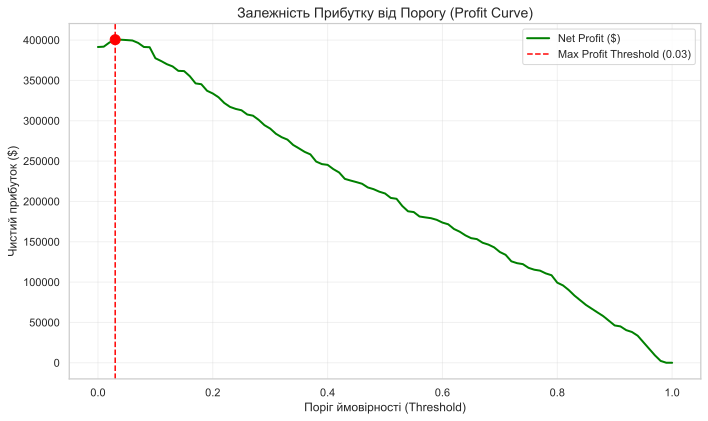

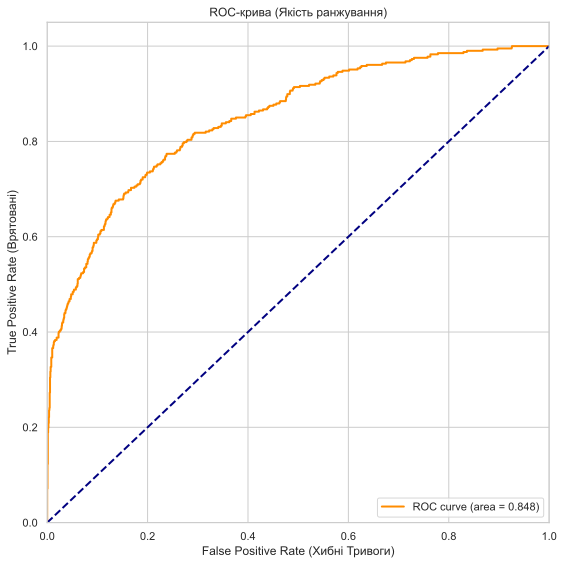

In [25]:
# БЛОК 3.32: Крива прибутку (Profit Curve) та ROC-AUC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

print(f"{'='*20} ФІНАНСОВА ОПТИМІЗАЦІЯ {'='*20}")

# 1. ДАНІ ДЛЯ РОЗРАХУНКУ
# Використовуємо ті самі змінні вартості
# avg_value_lost - скільки втрачаємо на клієнті (~$1200)
# COST_RETENTION - вартість дзвінка ($50)

thresholds = np.linspace(0, 1, 101) # Перевіримо пороги від 0% до 100% з кроком 1%
profits = []

# Отримуємо істинні значення та ймовірності
y_true = y_test
y_scores = full_ensemble_pipeline.predict_proba(X_test_engineered)[:, 1]

# 2. ЦИКЛ ПО ПОРОГАХ
for t in thresholds:
    # Прогноз за поточним порогом
    y_pred_t = (y_scores >= t).astype(int)
    
    # Рахуємо TP і FP
    # (TN і FN тут рахувати довго, простіше через вектори)
    TP = np.sum((y_true == 1) & (y_pred_t == 1))
    FP = np.sum((y_true == 0) & (y_pred_t == 1))
    
    # Формула прибутку: (Врятовані * $1200) - (Дзвінки * $50)
    # Дзвінки = TP + FP
    current_profit = (TP * avg_value_lost) - ((TP + FP) * COST_RETENTION)
    profits.append(current_profit)

# 3. ЗНАХОДЖЕННЯ МАКСИМУМУ
max_profit = max(profits)
best_financial_threshold = thresholds[np.argmax(profits)]

print(f"Максимальний можливий прибуток: ${max_profit:,.2f}")
print(f"Ідеальний фінансовий поріг: {best_financial_threshold:.2f}")
print(f"(Для порівняння: поріг по F1-score був {best_threshold:.2f})")


# 4. ВІЗУАЛІЗАЦІЯ 1: PROFIT CURVE
plt.figure(figsize=(10, 6))
plt.plot(thresholds, profits, color='green', linewidth=2, label='Net Profit ($)')

# Позначаємо точки
plt.axvline(best_financial_threshold, color='red', linestyle='--', label=f'Max Profit Threshold ({best_financial_threshold:.2f})')
plt.scatter(best_financial_threshold, max_profit, color='red', s=100, zorder=5)

plt.title('Залежність Прибутку від Порогу (Profit Curve)', fontsize=14)
plt.xlabel('Поріг ймовірності (Threshold)')
plt.ylabel('Чистий прибуток ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("output_images/Profit_Curve.svg")
plt.show()


# 5. ВІЗУАЛІЗАЦІЯ 2: ROC-AUC CURVE (Класика)
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Лінія випадкового вгадування

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Хибні Тривоги)')
plt.ylabel('True Positive Rate (Врятовані)')
plt.title('ROC-крива (Якість ранжування)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.savefig("output_images/ROC_Curve.svg")
plt.show()

## БЛОК 3.33: SHAP Analysis (Інтерпретація)

==================== SHAP ANALYSIS (FINAL) ====================
Дані підготовлено для SHAP.
Кількість ознак після кодування: 14


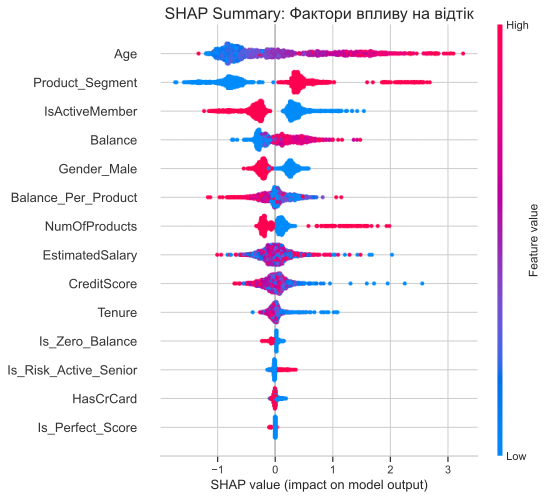

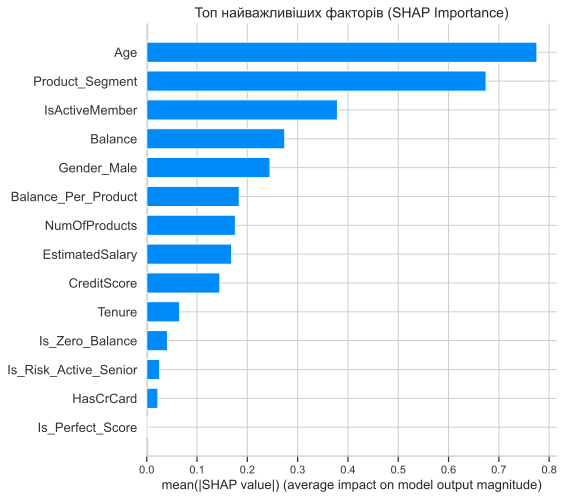


ІНТЕРПРЕТАЦІЯ:
На графіку Summary Plot:
- Чим вище ознака, тим вона важливіша.
- Червоні точки справа: Високе значення ознаки підвищує ризик.
- Сині точки справа: Низьке значення ознаки підвищує ризик.

Приклад:
Якщо 'NumOfProducts' червоне і зліва -> багато продуктів знижує ризик (для 2 продуктів).
Якщо 'Age' червоне і справа -> старість підвищує ризик.


In [26]:
# БЛОК 3.33 (ВИПРАВЛЕНИЙ): SHAP Analysis (Інтерпретація)

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(f"{'='*20} SHAP ANALYSIS (FINAL) {'='*20}")

# 1. Підготовка даних для SHAP
# Нам треба дані, які вже пройшли OneHotEncoding та Scaling
preprocessor = full_ensemble_pipeline.named_steps['preprocessor']
X_test_processed = preprocessor.transform(X_test_engineered)

# 2. Відновлення назв колонок (щоб графік був читабельним)
# Це трохи магії, бо ColumnTransformer ховає назви глибоко
def get_feature_names(column_transformer):
    output_features = []
    
    # Проходимо по кожному трансформеру всередині
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder': # Якщо це drop, пропускаємо
            continue
        if hasattr(pipe, 'get_feature_names_out'): # Для OneHotEncoder
            # Додаємо назви, які згенерував енкодер (напр. Gender_Male)
            output_features.extend(pipe.get_feature_names_out(features))
        else: # Для StandardScaler та passthrough
            output_features.extend(features)
            
    return output_features

feature_names = get_feature_names(preprocessor)

# Перетворюємо назад у DataFrame для краси
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

print("Дані підготовлено для SHAP.")
print(f"Кількість ознак після кодування: {len(feature_names)}")

# 3. Витягуємо модель GradientBoosting з ансамблю
gb_model_extracted = full_ensemble_pipeline.named_steps['ensemble'].named_estimators_['gb']

# 4. Створюємо Explainer
explainer = shap.TreeExplainer(gb_model_extracted)
shap_values = explainer.shap_values(X_test_processed_df)

# 5. SUMMARY PLOT
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test_processed_df, show=False)
plt.title('SHAP Summary: Фактори впливу на відтік', fontsize=16)
plt.tight_layout()
plt.savefig("output_images/SHAP_Summary.svg")
plt.show()

# 6. БАР-ЧАРТ (Тільки важливість)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_processed_df, plot_type="bar", show=False)
plt.title('Топ найважливіших факторів (SHAP Importance)', fontsize=14)
plt.tight_layout()
plt.savefig("output_images/SHAP_Bar.svg")
plt.show()

print("\nІНТЕРПРЕТАЦІЯ:")
print("На графіку Summary Plot:")
print("- Чим вище ознака, тим вона важливіша.")
print("- Червоні точки справа: Високе значення ознаки підвищує ризик.")
print("- Сині точки справа: Низьке значення ознаки підвищує ризик.")
print("\nПриклад:")
print("Якщо 'NumOfProducts' червоне і зліва -> багато продуктів знижує ризик (для 2 продуктів).")
print("Якщо 'Age' червоне і справа -> старість підвищує ризик.")

## БЛОК 3.40: Збереження фінальної моделі

In [27]:
# БЛОК 3.40: Збереження фінальної моделі

import joblib
import os

print(f"{'='*20} ЗБЕРЕЖЕННЯ МОДЕЛІ {'='*20}")

# 1. Перевіряємо, чи існує об'єкт engineer
# (Ви його створили в Блоці 3.10, а full_ensemble_pipeline в Блоці 3.22)

# 2. Пакуємо все в один словник
# Це "капсула часу", яка містить всю логіку проекту
final_objects = {
    'engineer': engineer,               # Клас для створення нових ознак
    'model': full_ensemble_pipeline,    # Навчений ансамбль
    'threshold': best_financial_threshold # Оптимальний поріг (0.03), який ми знайшли
}

# 3. Зберігаємо
filename = 'churn_model_final.joblib'
joblib.dump(final_objects, filename)

print(f"Файл '{filename}' успішно створено.")
print(f"Розмір файлу: {os.path.getsize(filename) / 1024:.2f} KB")
print("Тепер можна запускати app.py")

==================== ЗБЕРЕЖЕННЯ МОДЕЛІ ====================
Файл 'churn_model_final.joblib' успішно створено.
Розмір файлу: 18522.51 KB
Тепер можна запускати app.py


## app.py (стоврюються окремо)

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import plotly.graph_objects as go
from sklearn.base import BaseEstimator, TransformerMixin
import openai

# --- 0. НАЛАШТУВАННЯ КЛАСУ (Обов'язково для joblib) ---
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = X.copy()
        df['Is_Zero_Balance'] = (df['Balance'] == 0).astype(int)
        df['Is_Risk_Active_Senior'] = ((df['Age'] >= 45) & (df['Age'] <= 60) & (df['Balance'] > 0)).astype(int)
        def product_segment(n):
            if n == 1: return 1
            elif n == 2: return 0
            else: return 2
        df['Product_Segment'] = df['NumOfProducts'].apply(product_segment)
        df['Balance_Per_Product'] = df['Balance'] / df['NumOfProducts']
        df['Is_Perfect_Score'] = (df['CreditScore'] == 850).astype(int)
        cols_to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Geography']
        df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
        return df

# --- 1. КОНФІГУРАЦІЯ СТОРІНКИ ---
st.set_page_config(page_title="Bank Retention System", layout="wide")

# Стилізація під "Bootstrap" (чистий вигляд)
st.markdown("""
<style>
    .main {
        background-color: #f8f9fa;
    }
    h1 {
        color: #0d6efd;
    }
    .stButton>button {
        background-color: #0d6efd;
        color: white;
        border-radius: 5px;
    }
</style>
""", unsafe_allow_html=True)

st.title("Система Прогнозування Відтоку Клієнтів")
st.markdown("---")

# --- 2. ЗАВАНТАЖЕННЯ МОДЕЛІ ---
@st.cache_resource
def load_model():
    try:
        return joblib.load('churn_model_final.joblib')
    except FileNotFoundError:
        return None

bundle = load_model()

if not bundle:
    st.error("Помилка: Файл моделі 'churn_model_final.joblib' не знайдено.")
    st.stop()

engineer = bundle['engineer']
model = bundle['model']
optimal_threshold = bundle['threshold']

# --- 3. БІЧНА ПАНЕЛЬ (ВВІД) ---
st.sidebar.header("Параметри Клієнта")

# Секція налаштувань моделі
with st.sidebar.expander("Налаштування Моделі", expanded=False):
    current_threshold = st.slider(
        "Поріг чутливості (Threshold)", 
        min_value=0.0, max_value=1.0, 
        value=float(optimal_threshold), 
        step=0.01,
        help="Зменшення порогу збільшує кількість виявлених ризиків, але може дати більше хибних спрацювань."
    )

# API Key
api_key = st.sidebar.text_input("OpenAI API Key", type="password")

# Ввід даних
credit_score = st.sidebar.slider("Кредитний Рейтинг", 350, 850, 650)
age = st.sidebar.number_input("Вік", 18, 92, 45)
tenure = st.sidebar.slider("Термін співпраці (років)", 0, 10, 5)
balance = st.sidebar.number_input("Баланс рахунку ($)", 0.0, 250000.0, 50000.0)
products = st.sidebar.selectbox("Кількість продуктів", [1, 2, 3, 4], index=0)
salary = st.sidebar.number_input("Орієнтовна зарплата ($)", 0.0, 200000.0, 60000.0)
gender = st.sidebar.selectbox("Стать", ["Male", "Female"])
has_cr_card = st.sidebar.checkbox("Наявність кредитної картки", value=True)
is_active = st.sidebar.checkbox("Активний учасник", value=True)

# Формування DataFrame
input_data = pd.DataFrame({
    'CreditScore': [credit_score],
    'Geography': ['France'], # Заглушка
    'Gender': [gender],
    'Age': [age],
    'Tenure': [tenure],
    'Balance': [balance],
    'NumOfProducts': [products],
    'HasCrCard': [int(has_cr_card)],
    'IsActiveMember': [int(is_active)],
    'EstimatedSalary': [salary],
    'RowNumber': [0], 'CustomerId': [0], 'Surname': ['X']
})

# --- 4. ПРОГНОЗУВАННЯ ---
processed_data = engineer.transform(input_data)
prob = model.predict_proba(processed_data)[0][1]

# Логіка статусів
if prob < 0.20:
    status = "Низький ризик"
    color = "#198754" # Green
elif prob < current_threshold:
    status = "Моніторинг"
    color = "#ffc107" # Yellow
elif prob < 0.85:
    status = "Високий ризик"
    color = "#fd7e14" # Orange
else:
    status = "Критичний ризик"
    color = "#dc3545" # Red

# --- 5. ГОЛОВНА ПАНЕЛЬ ---
col1, col2 = st.columns([2, 1])

with col1:
    st.subheader("Результат Аналізу")
    
    # Метрики
    c1, c2 = st.columns(2)
    c1.metric("Ймовірність відтоку", f"{prob*100:.1f}%")
    c2.metric("Статус", status)

    # Спідометр (Gauge)
    fig = go.Figure(go.Indicator(
        mode = "gauge+number",
        value = prob * 100,
        title = {'text': "Score"},
        gauge = {
            'axis': {'range': [None, 100]},
            'bar': {'color': "black"},
            'steps': [
                {'range': [0, 20], 'color': "#198754"},
                {'range': [20, current_threshold*100], 'color': "#ffc107"},
                {'range': [current_threshold*100, 85], 'color': "#fd7e14"},
                {'range': [85, 100], 'color': "#dc3545"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': prob * 100
            }
        }
    ))
    fig.update_layout(height=300, margin=dict(l=20, r=20, t=50, b=20))
    st.plotly_chart(fig, use_container_width=True)

with col2:
    st.subheader("Фактори Впливу")
    
    reasons = []
    if products >= 3:
        st.error("Кількість продуктів: 3+")
        reasons.append("надмірна кількість продуктів")
    if age >= 45 and balance > 0:
        st.error("Вікова група ризику (45+)")
        reasons.append("вікова група з високим ризиком відтоку капіталу")
    if is_active == 0:
        st.warning("Низька активність")
        reasons.append("відсутність активності")
    if balance == 0:
        st.info("Нульовий баланс")
    
    if not reasons and prob < 0.2:
        st.success("Позитивна історія")

# --- 6. GENERATIVE AI ---
st.markdown("---")
st.subheader("Генерація Стратегії Утримання (OpenAI)")

if st.button("Згенерувати План Дій"):
    if not api_key:
        st.warning("Для генерації тексту необхідний API ключ.")
    else:
        client = openai.OpenAI(api_key=api_key)
        
        risk_context = ", ".join(reasons) if reasons else "Явних факторів не виявлено"
        
        prompt = f"""
        Виступай як професійний банківський аналітик.
        
        Профіль клієнта:
        - Вік: {age}
        - Баланс: ${balance:,.2f}
        - Продуктів: {products}
        - Ймовірність відтоку: {prob*100:.1f}%
        - Статус: {status}
        - Фактори ризику: {risk_context}
        
        Завдання:
        1. Сформулювати сухий, діловий план дій для менеджера (3 пункти).
        2. Написати текст електронного листа для клієнта. Тон: ввічливий, професійний, ненав'язливий. Запропонувати консультацію або перегляд умов.
        """
        
        with st.spinner("Генерація відповіді..."):
            try:
                response = client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[{"role": "user", "content": prompt}],
                    temperature=0.7
                )
                st.markdown(response.choices[0].message.content)
            except Exception as e:
                st.error(f"Помилка при зверненні до API: {e}")